<a href="https://colab.research.google.com/github/OtavioBosa/xp-posgraducao/blob/main/Tratamento_e_Processamento_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sql

BASE DE DADOS <br>
[Link Github](https://raw.githubusercontent.com/OtavioBosa/xp-posgraducao/Sprint_1-1/BaseDados.csv)

In [2]:
# Carregando o dataset
dataset = 'https://raw.githubusercontent.com/OtavioBosa/xp-posgraducao/Sprint_1-1/BaseDados.csv'
df = pd.read_csv(dataset, sep=',')

In [3]:
#Visualizando a Estrutura do Arquivo
df

,Ano,Mes,Dia,Total
0,2001,1,1,0
1,2001,1,2,5
2,2001,1,3,15
3,2001,1,4,3
4,2001,1,5,0
...,...,...,...,...
8030,2022,12,27,0
8031,2022,12,28,0
8032,2022,12,29,0
8033,2022,12,30,0


In [4]:
#Analisando as Colunas do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ano     8035 non-null   int64
 1   Mes     8035 non-null   int64
 2   Dia     8035 non-null   int64
 3   Total   8035 non-null   int64
dtypes: int64(4)
memory usage: 251.2 KB


In [3]:
# Convertendo as colunas de data em um objeto datetime, renomeando para o padrão
df['Data'] = pd.to_datetime(df[['Dia', 'Mes', 'Ano']].rename(columns={'Dia':'Day', 'Mes':'Month', 'Ano':'Year'}))

In [4]:
# Adicionando uma nova coluna com o mês correspondente a cada linha
df['Mes'] = df['Data'].apply(lambda x: x.month)

In [5]:
# Iterando pelos anos únicos e plotando um gráfico para cada ano
for year in df['Ano'].unique():

    # Filtrando o DataFrame para manter apenas as linhas correspondentes ao ano atual
    df_year = df[df['Ano'] == year]

In [6]:
# Agrupando os dados por mês e calculando a soma da coluna 'Total'
df_mensal = df.groupby(['Ano', 'Mes'])['Total'].sum().reset_index()

In [7]:
# Renomeando as colunas para deixar no formato esperado
df_mensal = df_mensal.rename(columns={'Ano': 'Year', 'Mes': 'Month', 'Total': 'Total_Mensal'})

In [8]:
# Exibindo as primeiras linhas do DataFrame com a nova coluna
print(df_mensal.head())

   Year  Month  Total_Mensal
0  2001      1           295
1  2001      2           303
2  2001      3           121
3  2001      4            40
4  2001      5           170


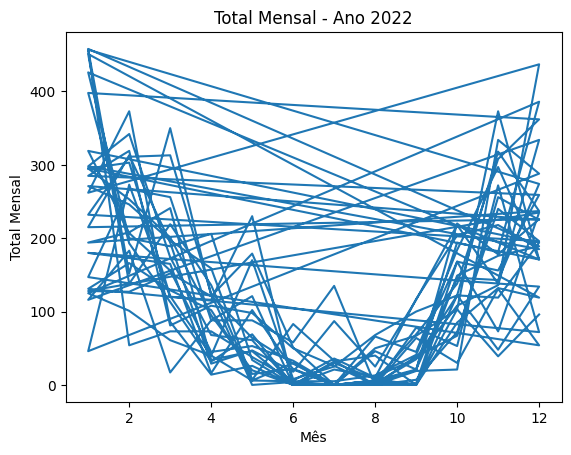

In [9]:
fig, ax = plt.subplots()
ax.plot(df_mensal['Month'], df_mensal['Total_Mensal'])
ax.set_xlabel('Mês')
ax.set_ylabel('Total Mensal')
ax.set_title('Total Mensal - Ano {}'.format(year))
plt.show()

In [ ]:
df_mensal['Ano'] = df_mensal['Data'].dt.year
df_mensal['Mes_Ano'] = df_mensal['Data'].dt.strftime('%b-%Y')
df_mensal['Total_Mensal'] = df_mensal['Total']

g = sns.FacetGrid(df_mensal, col="Ano", col_wrap=2, height=4)
g.map(sns.lineplot, "Mes_Ano", "Total_Mensal")
#g.set_xticklabels(rotation=45)

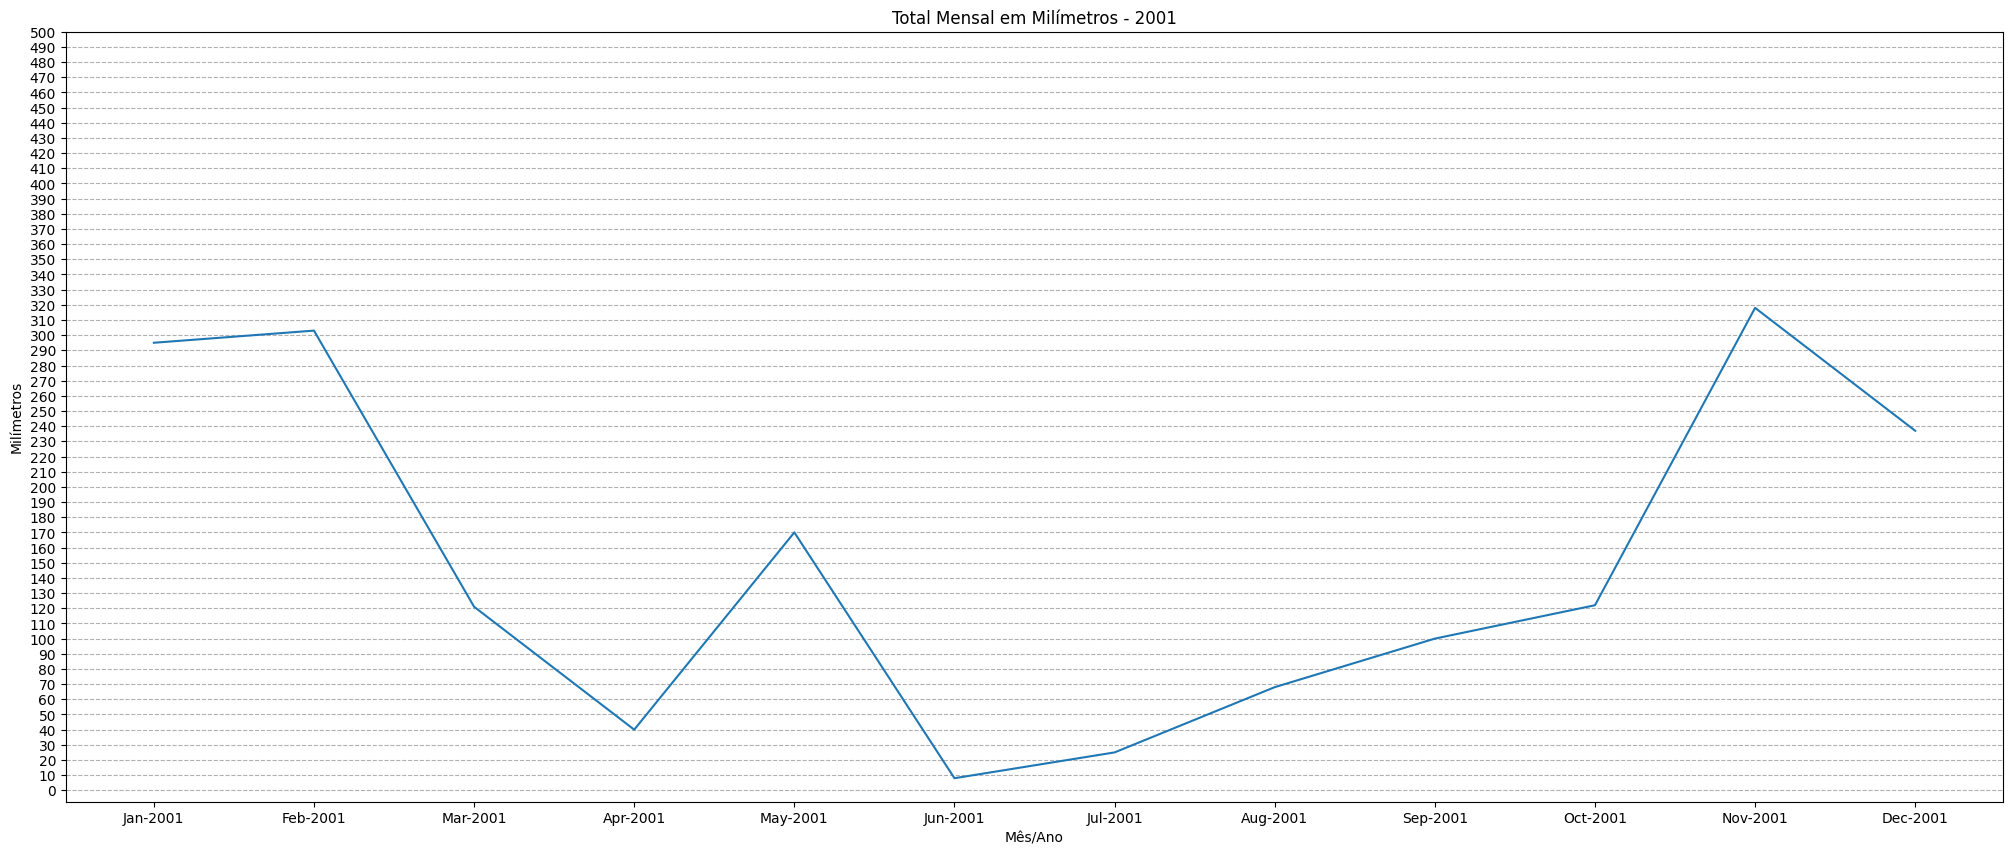

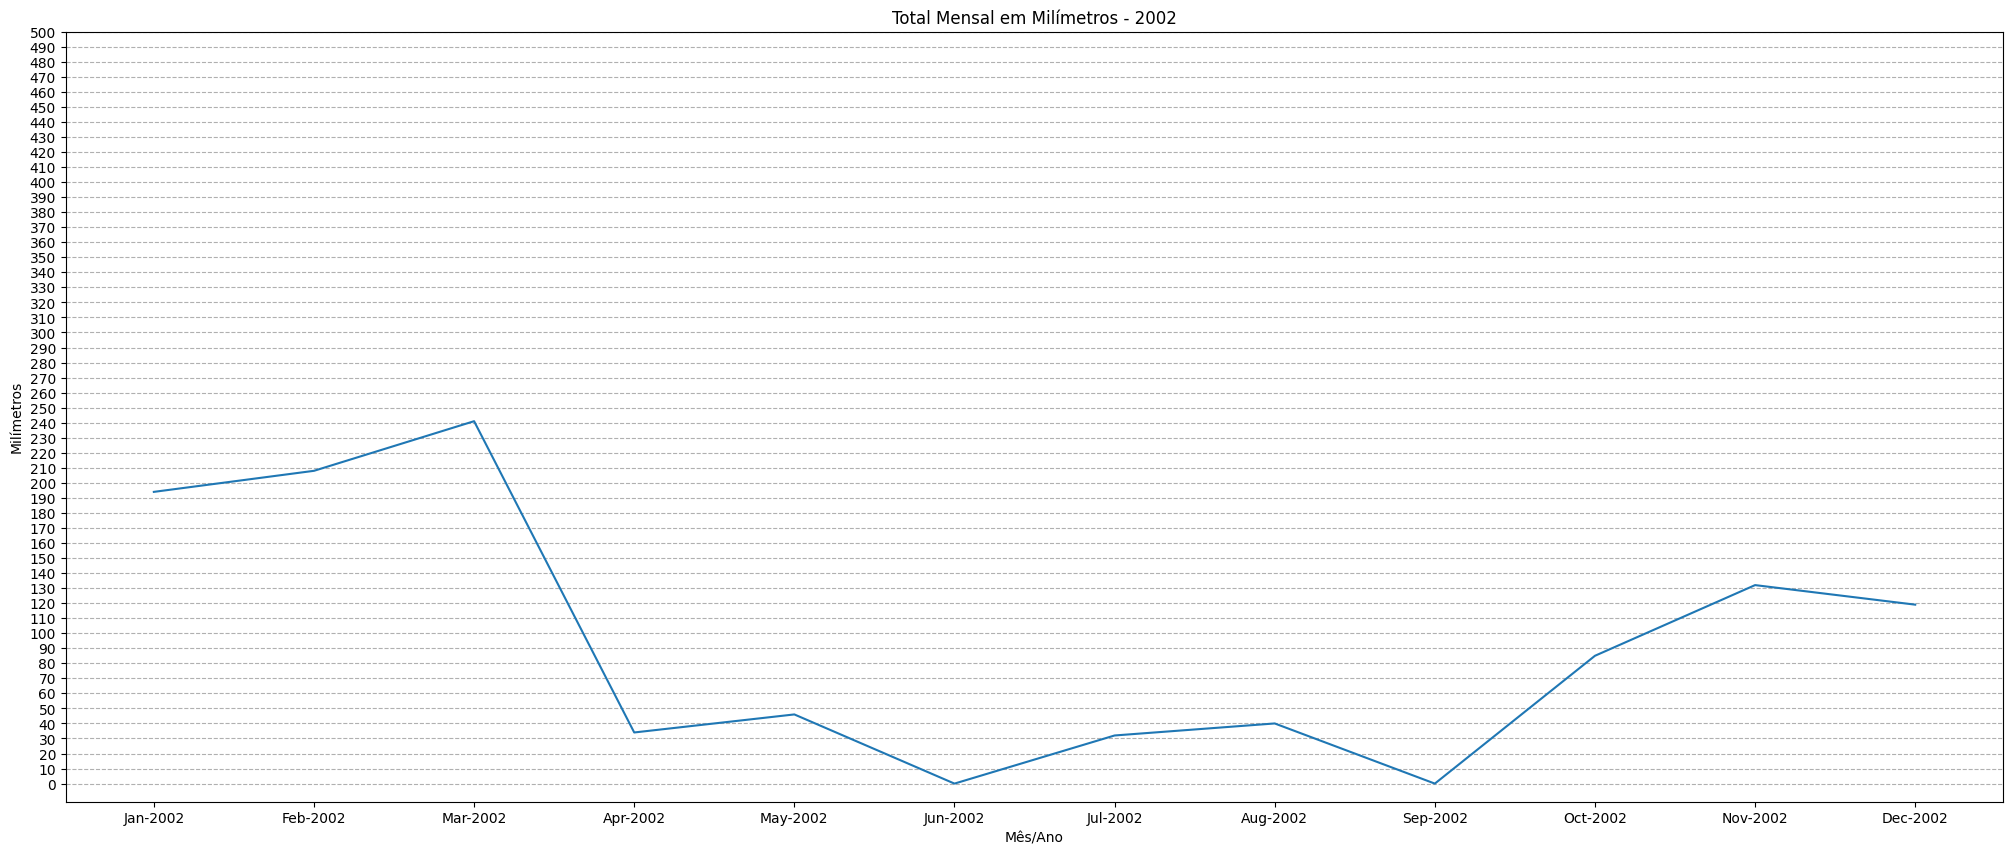

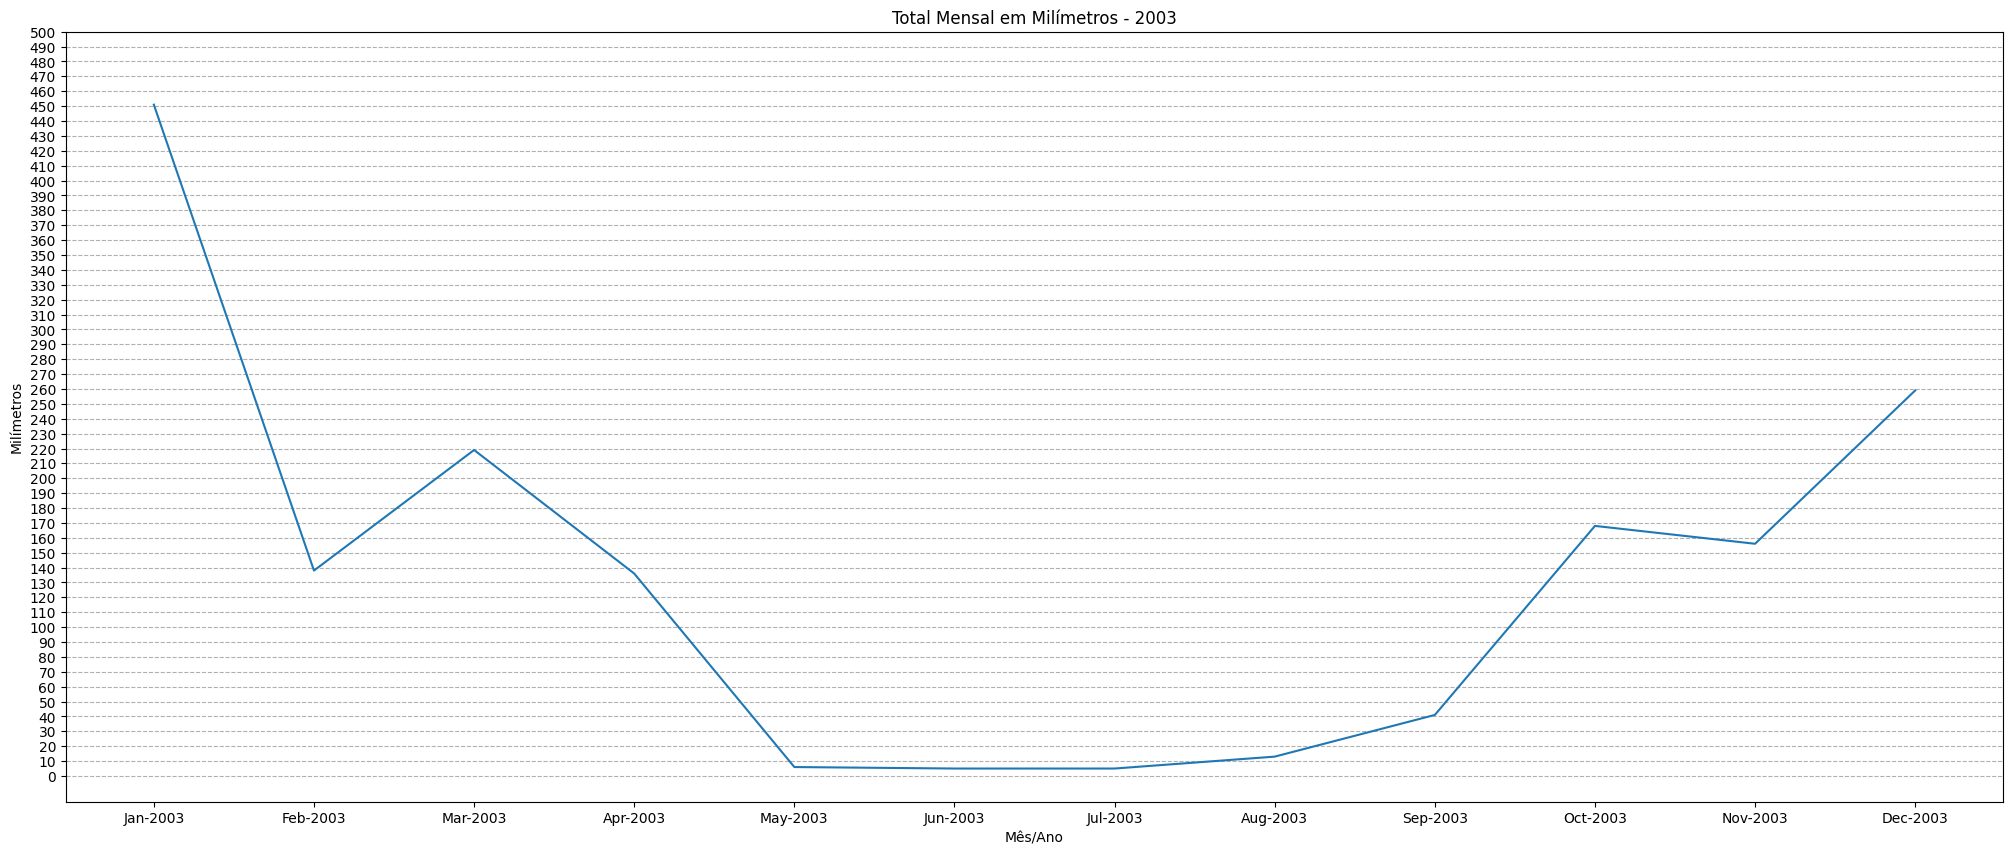

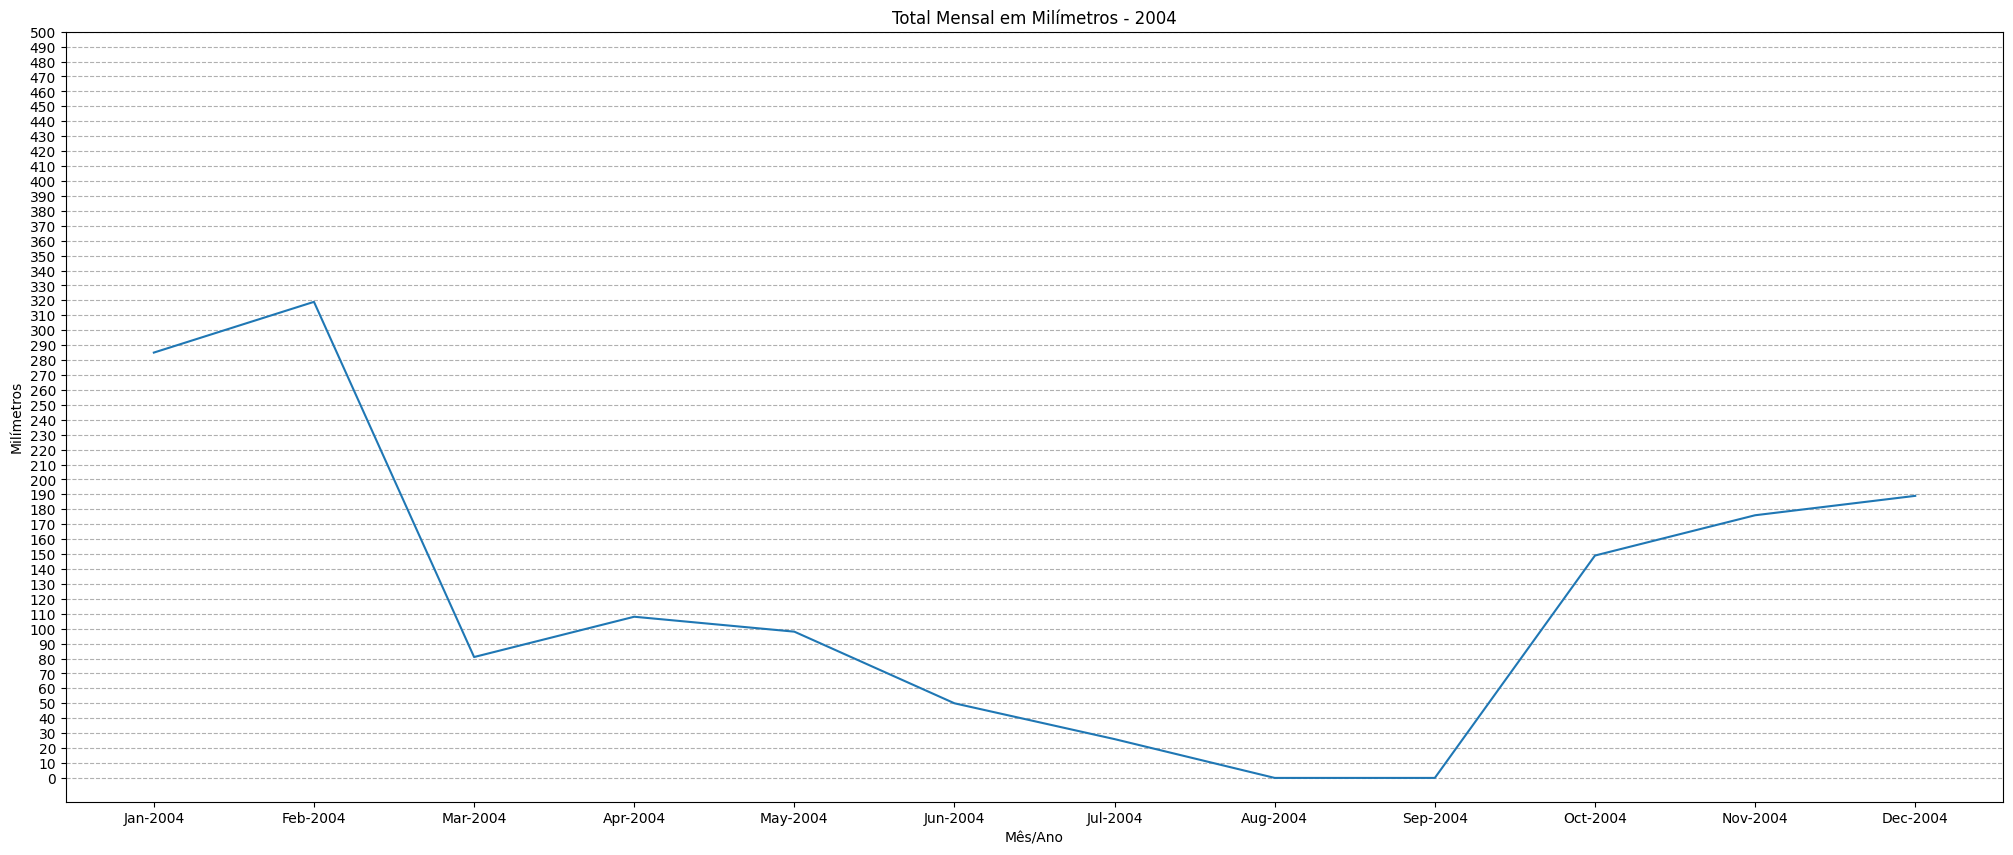

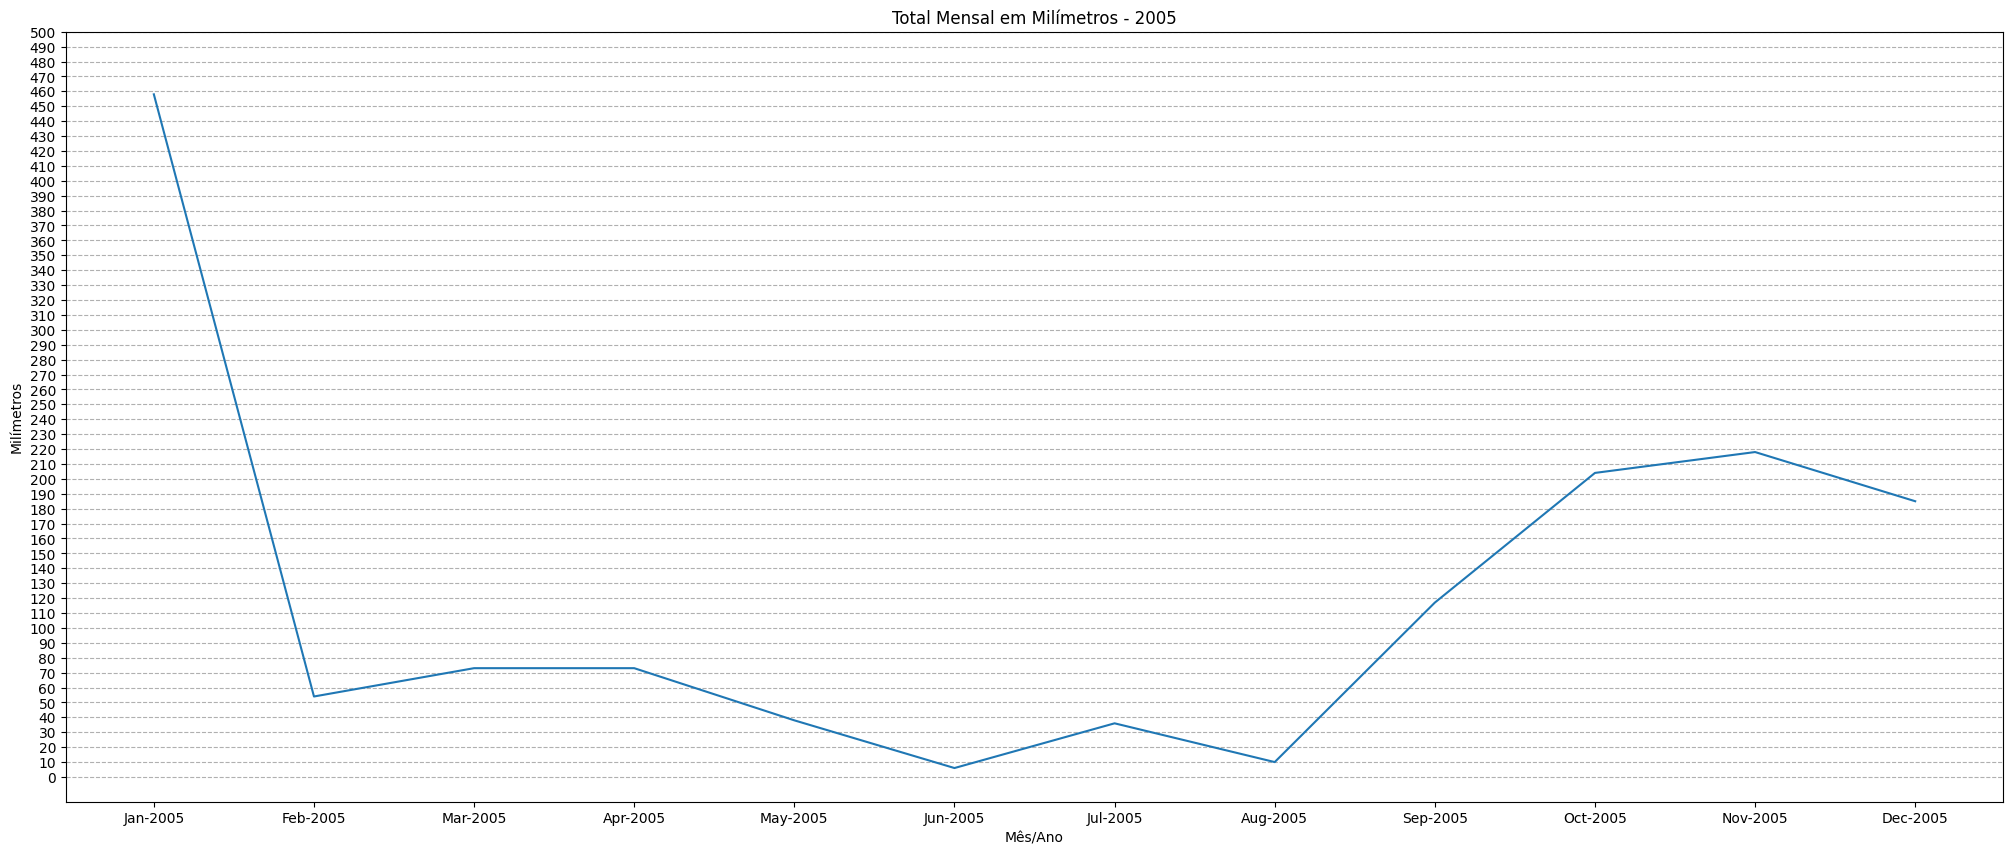

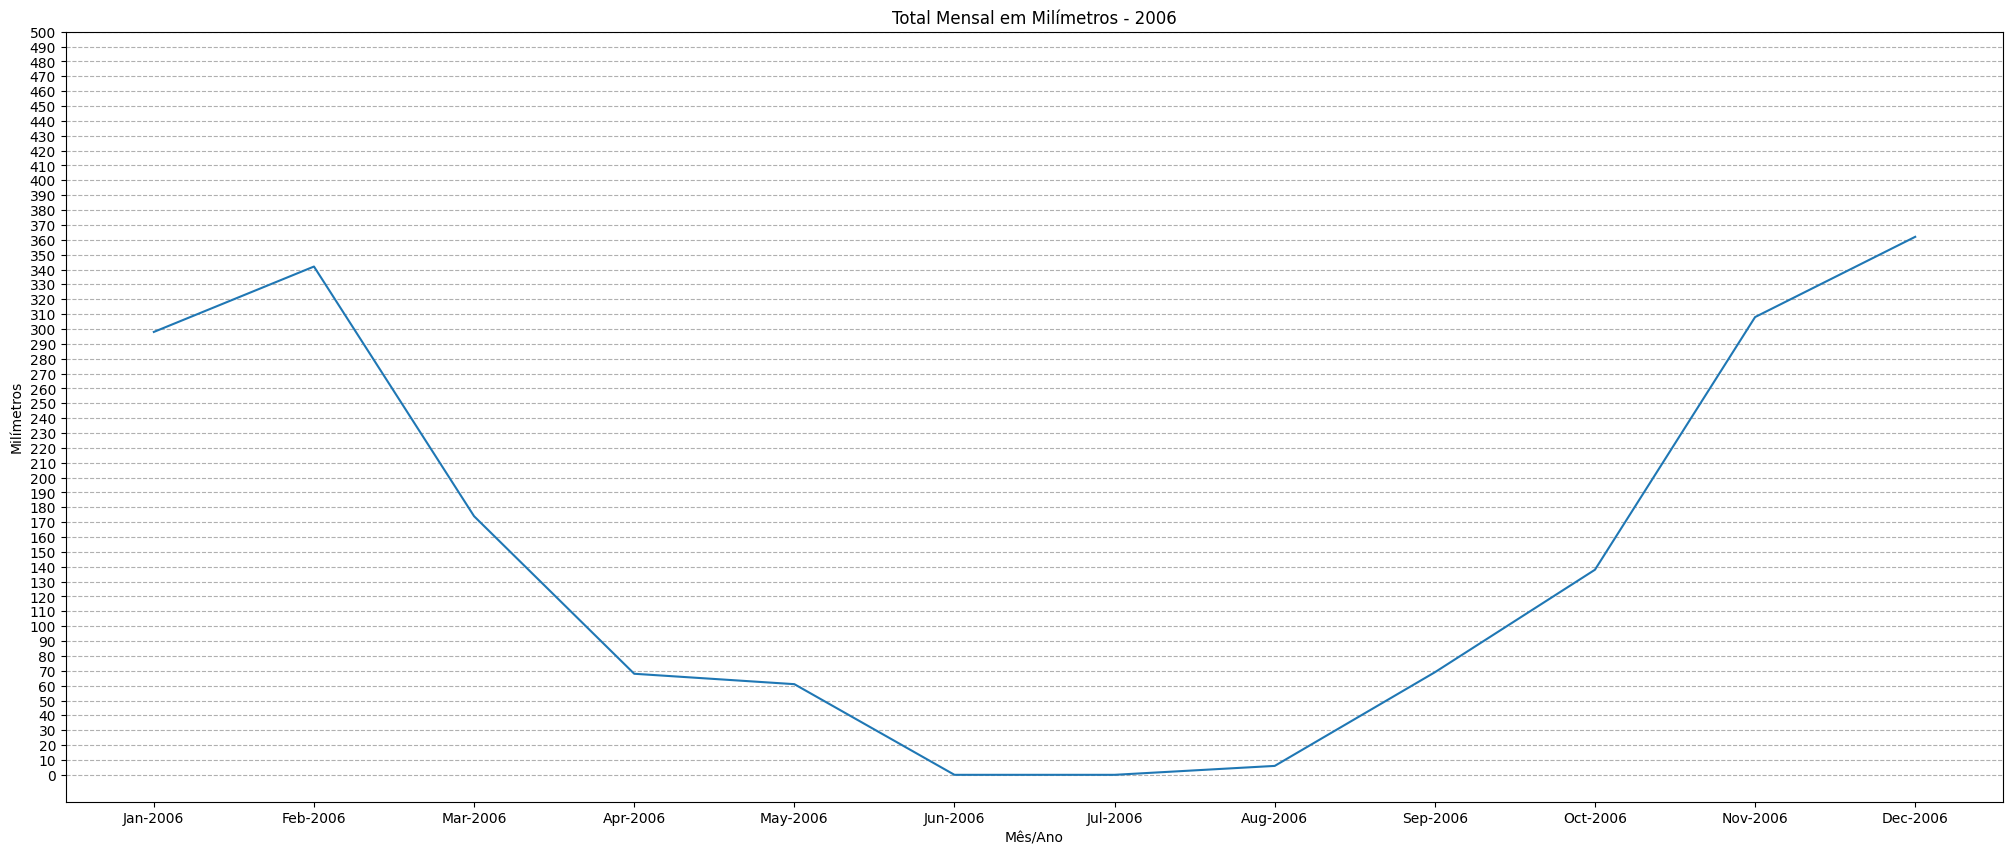

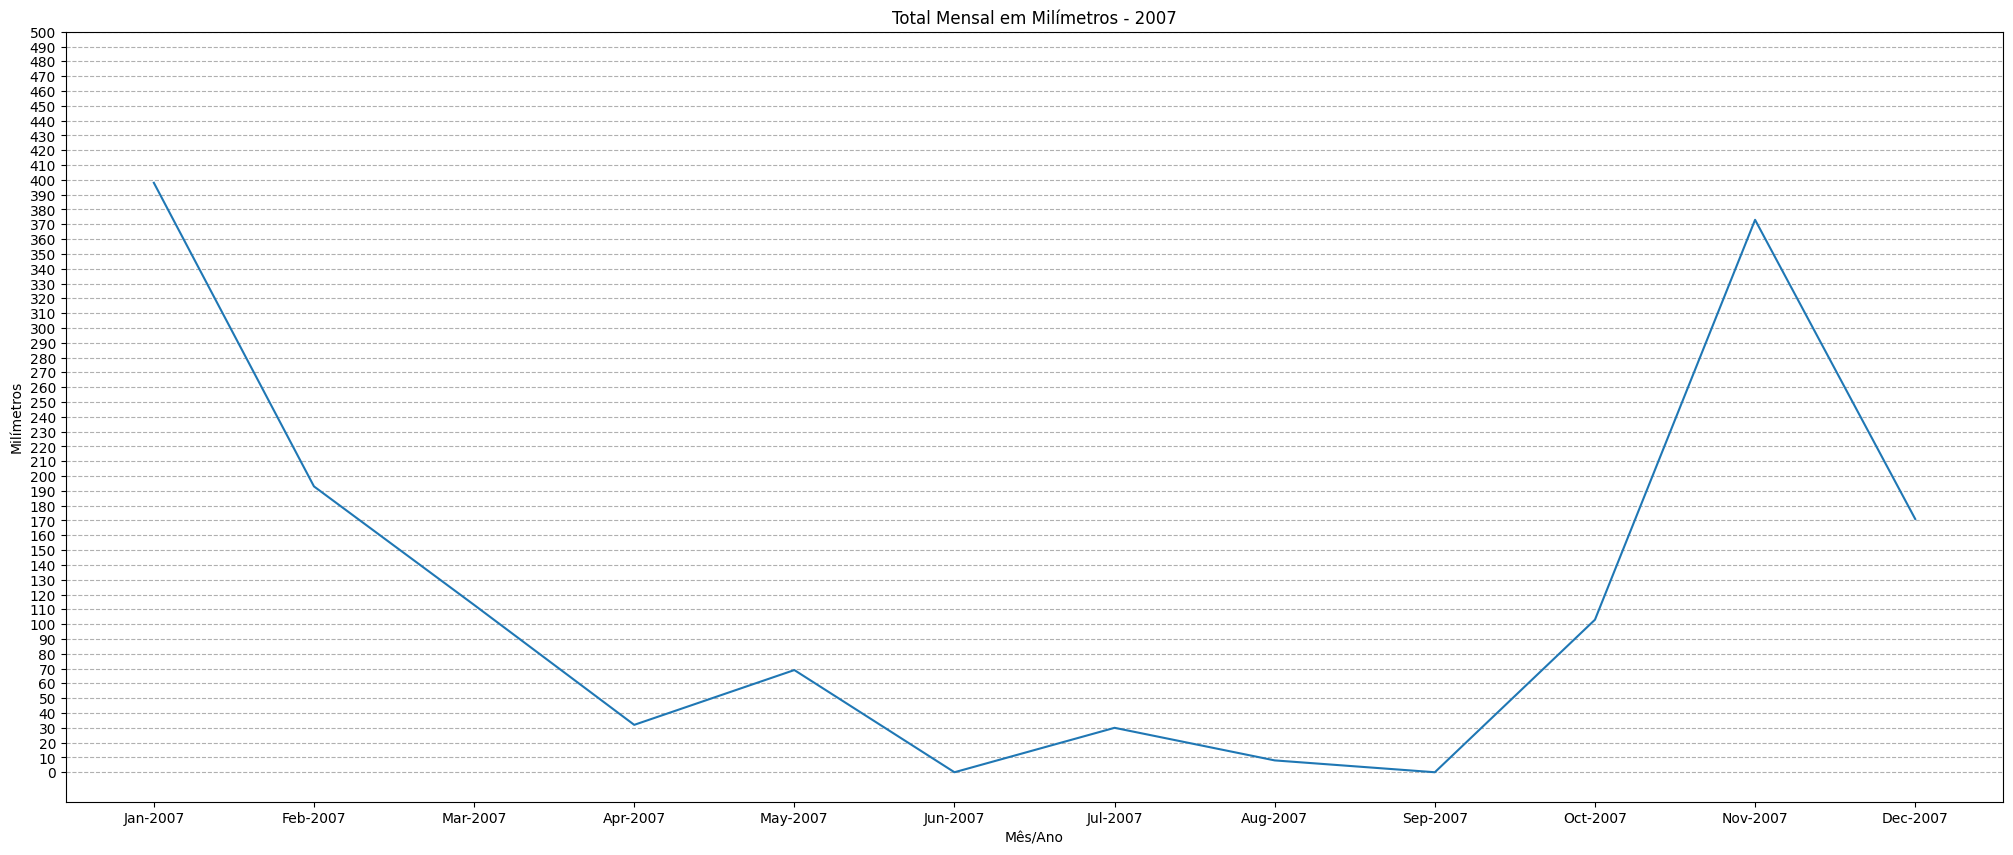

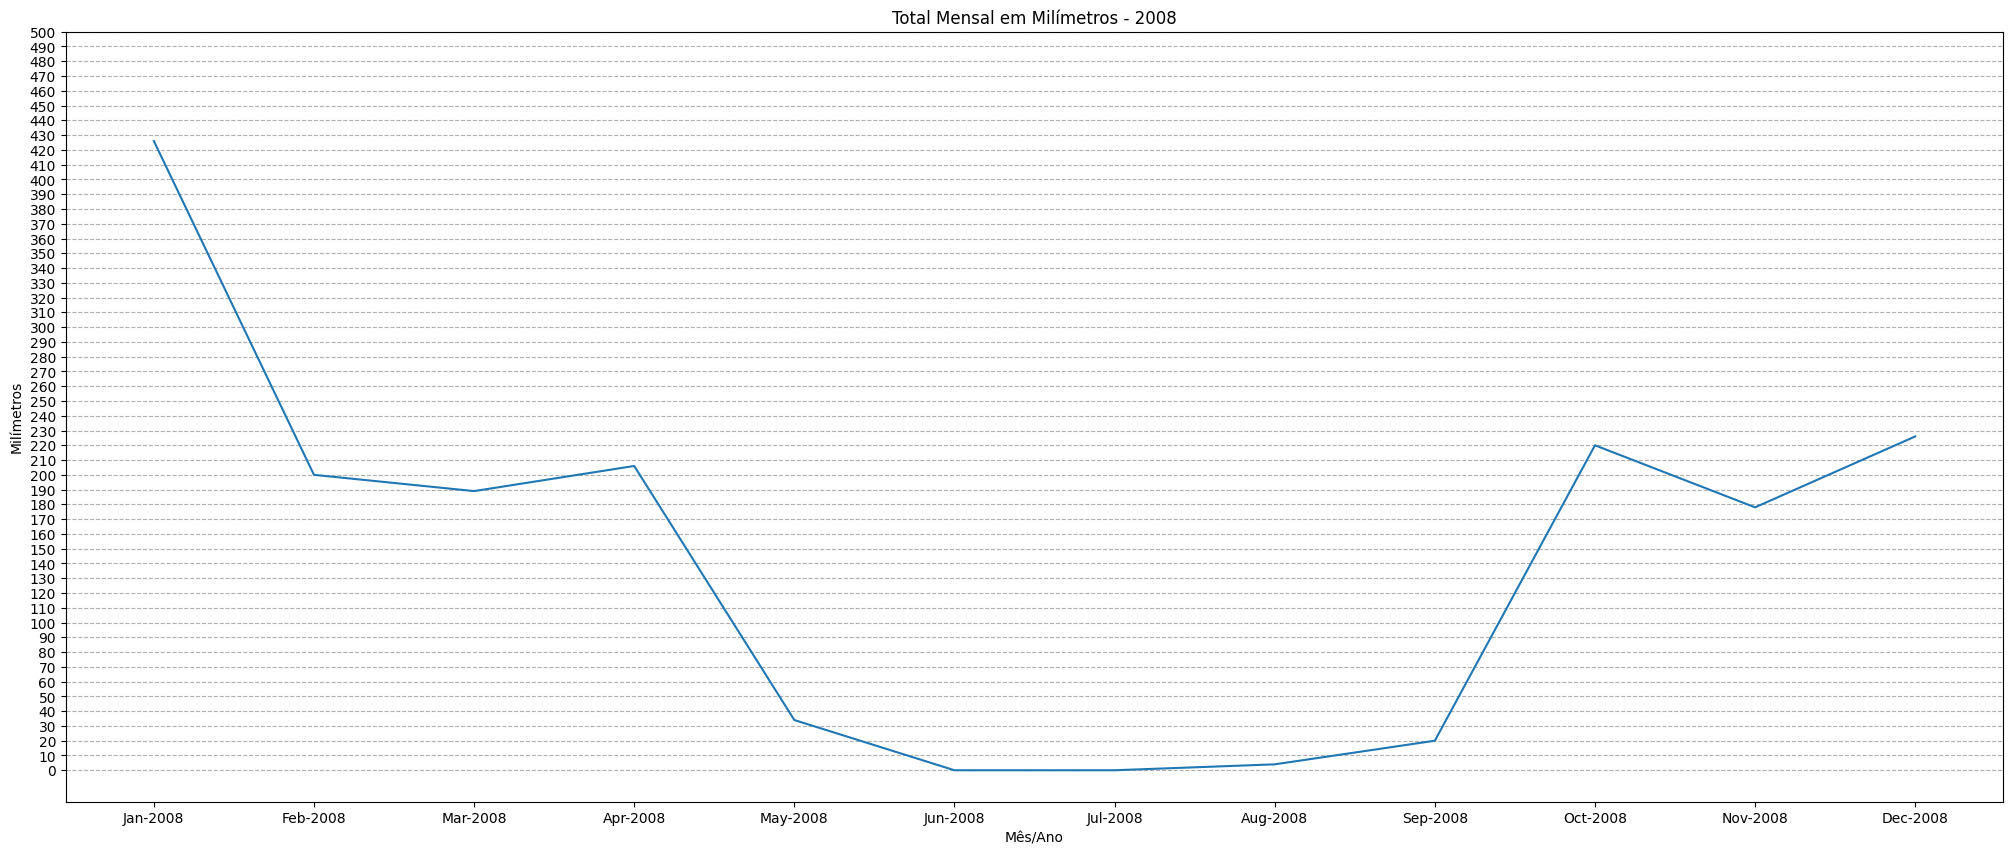

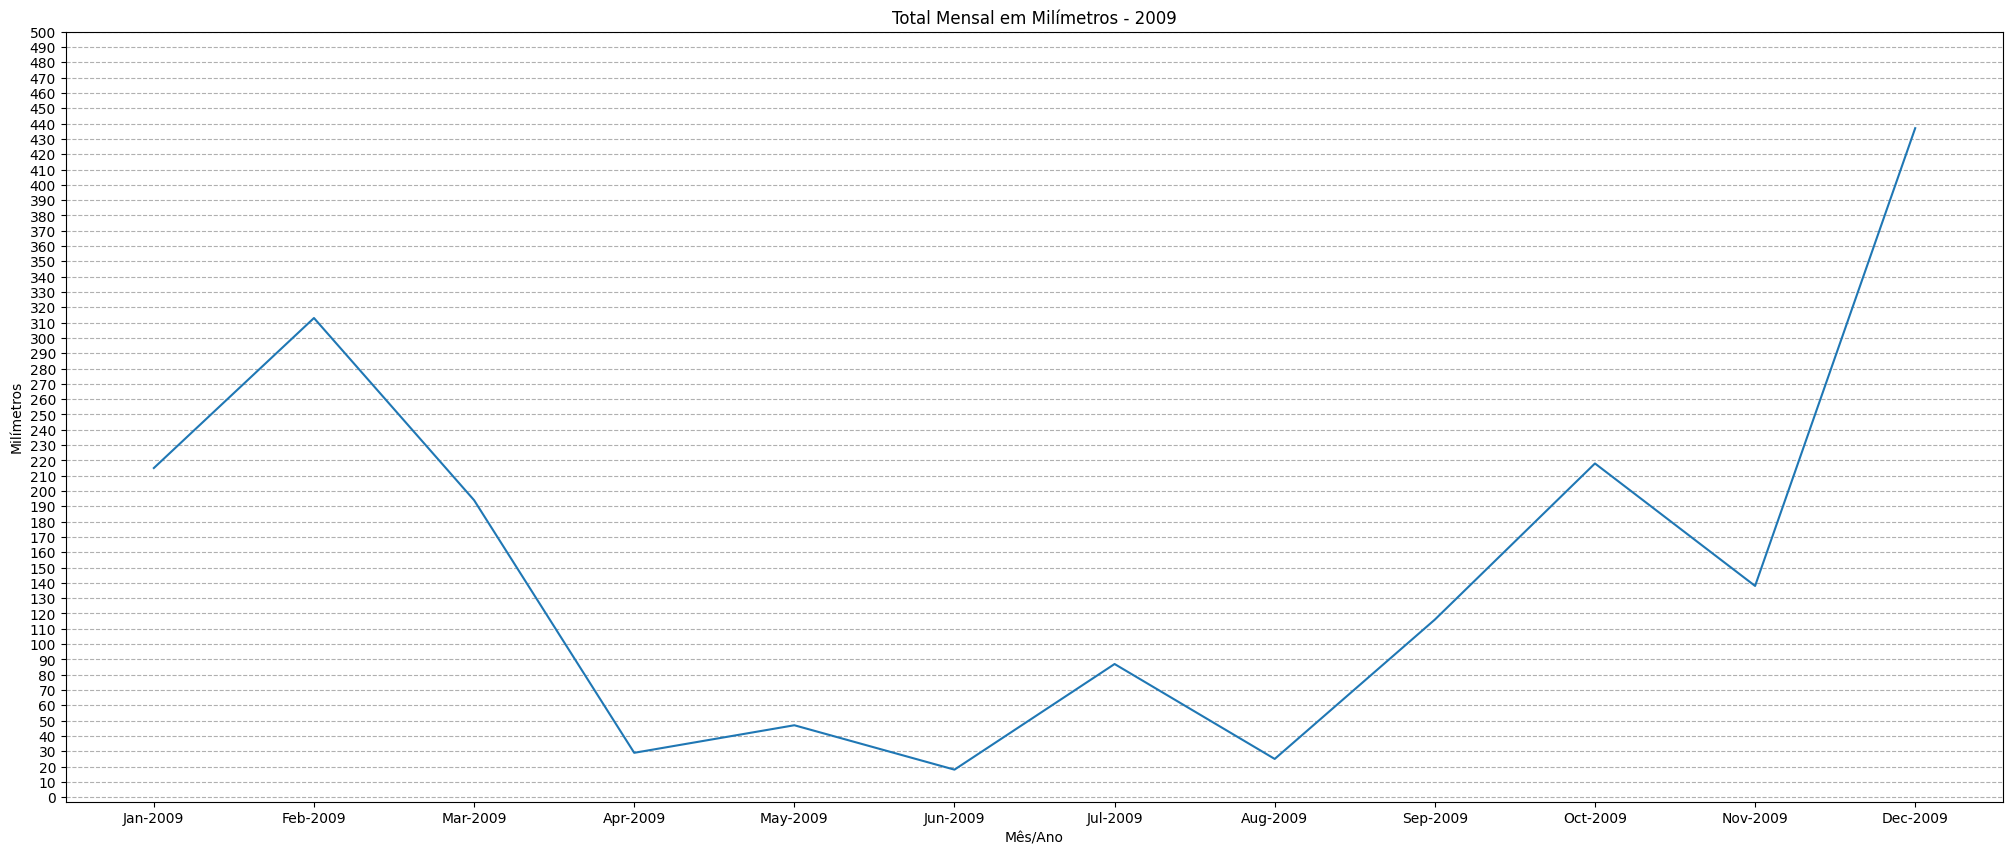

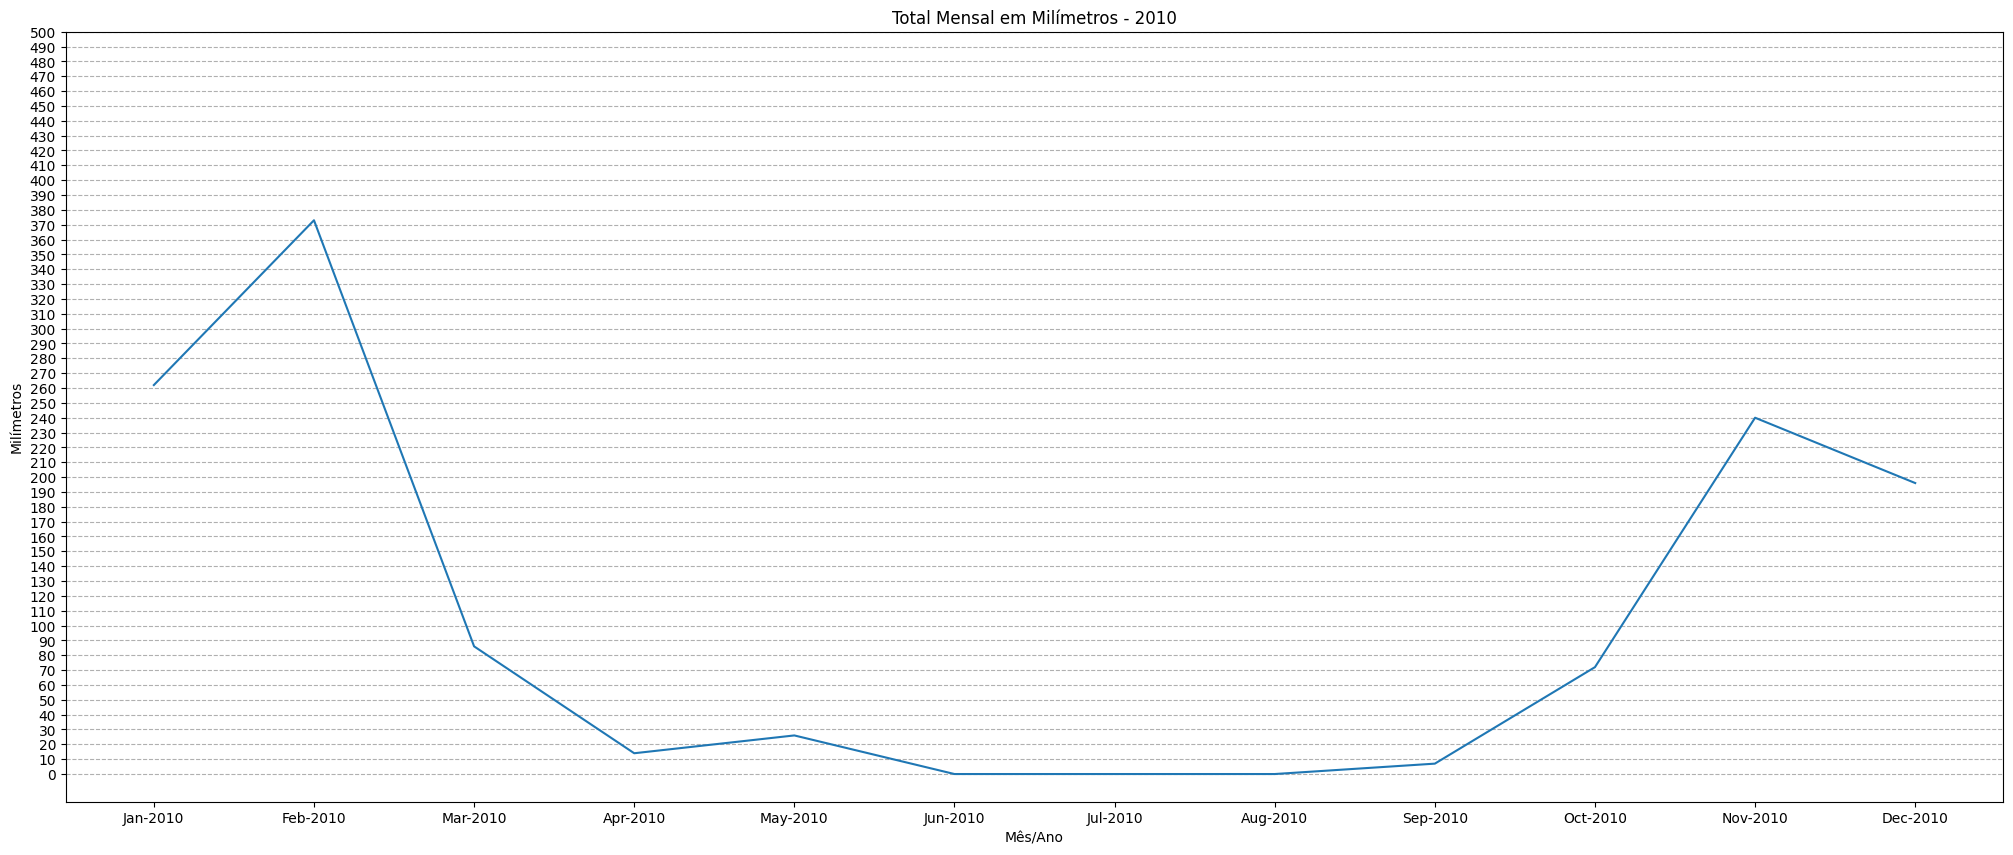

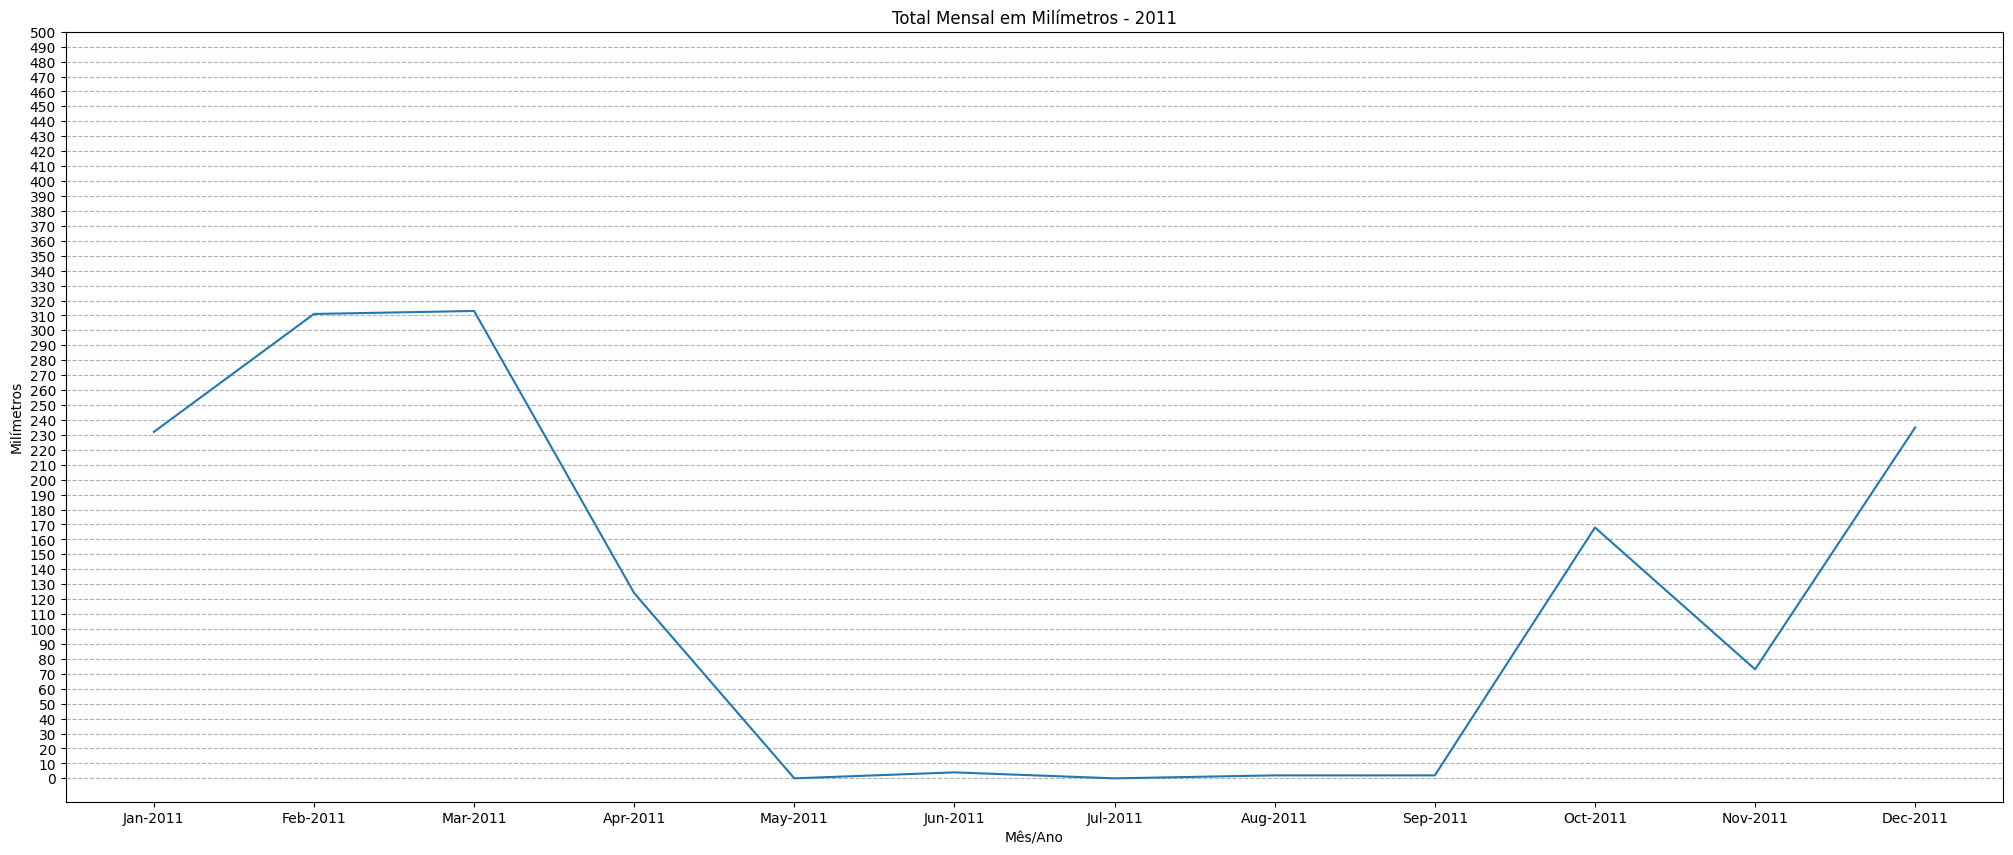

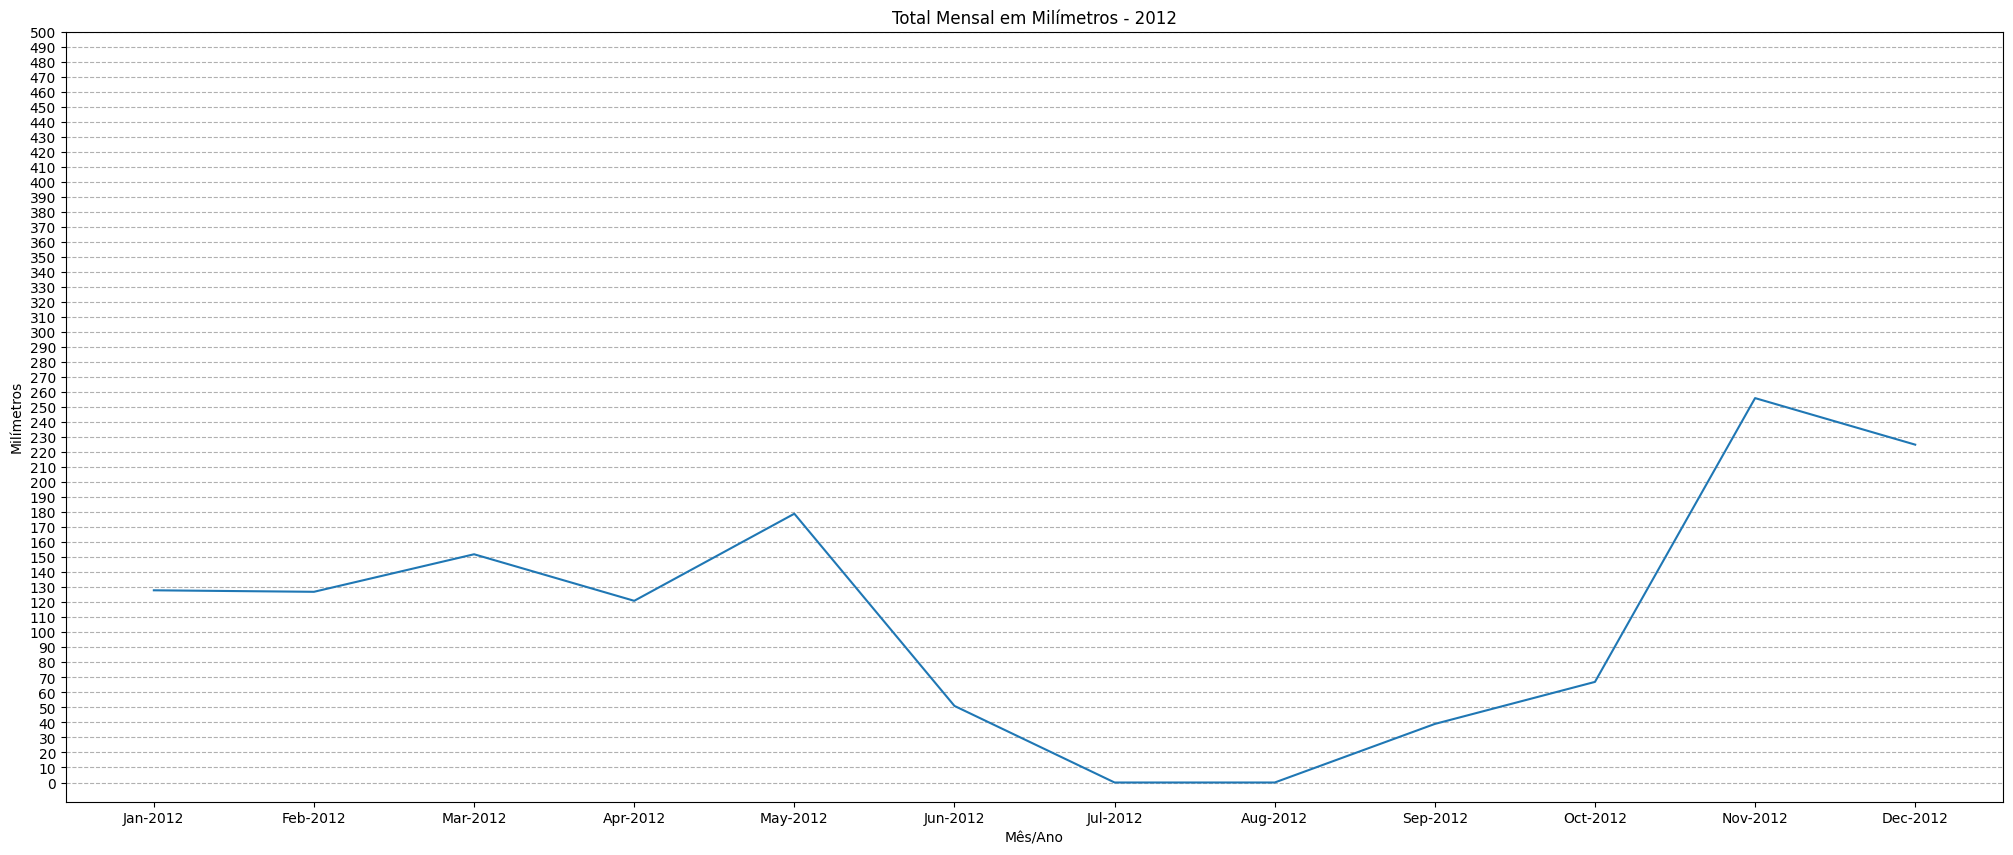

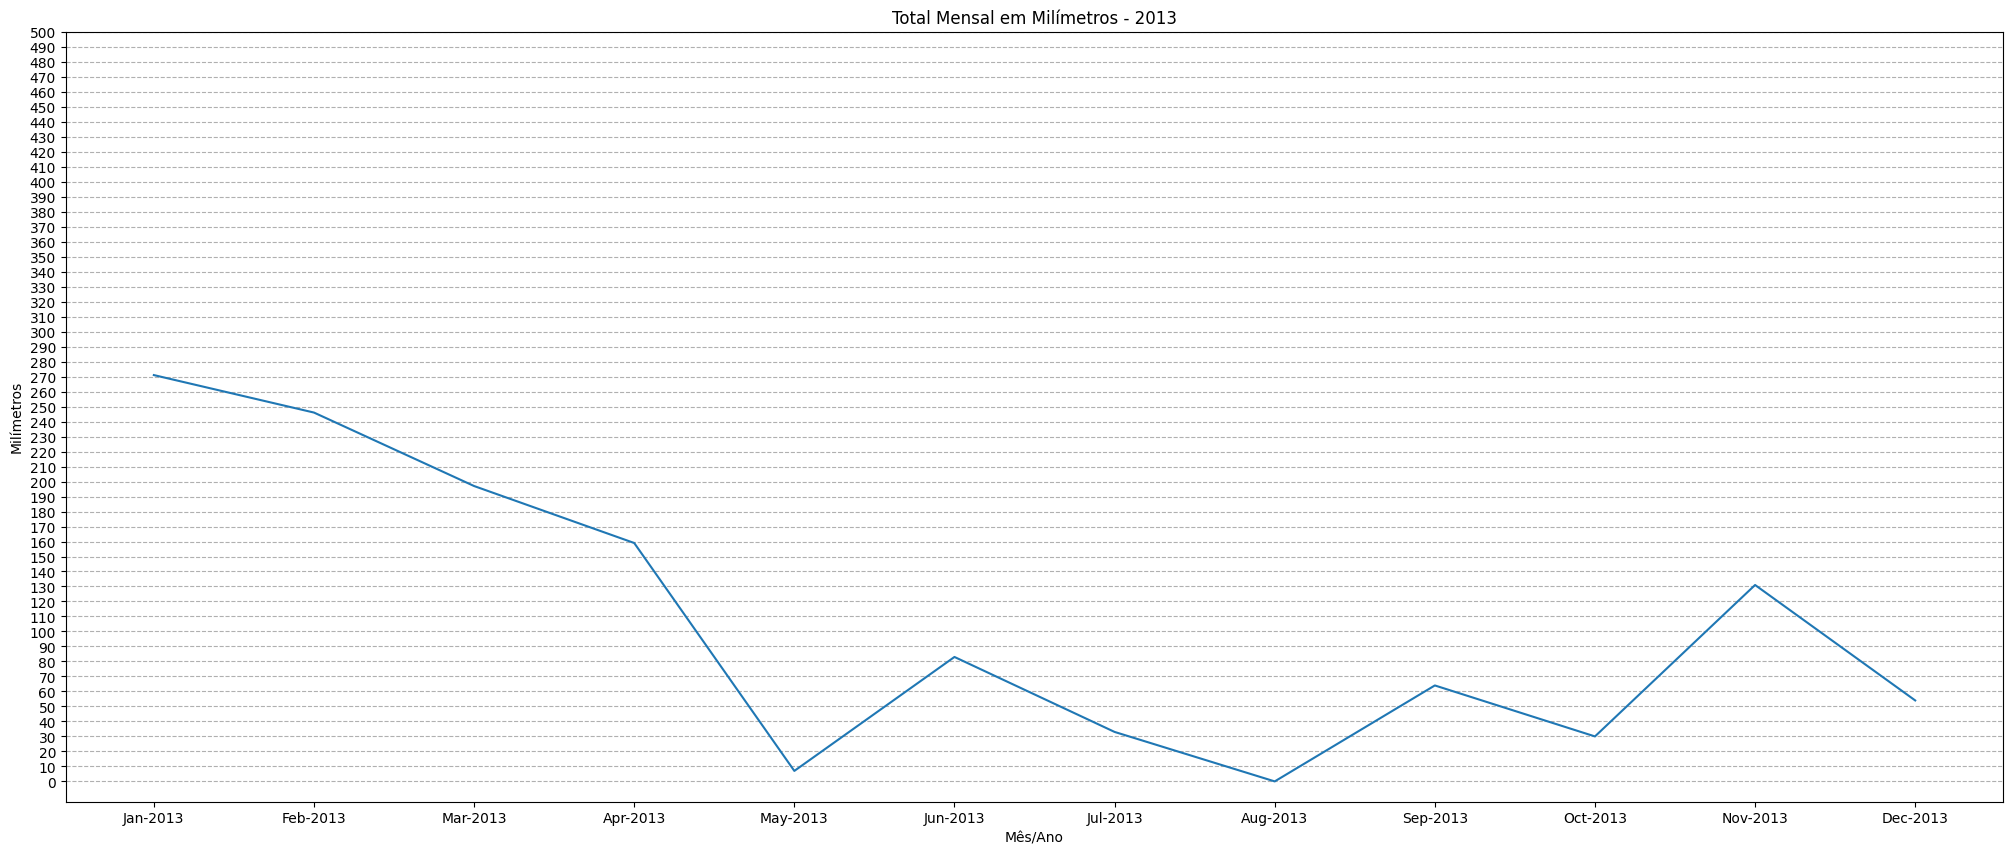

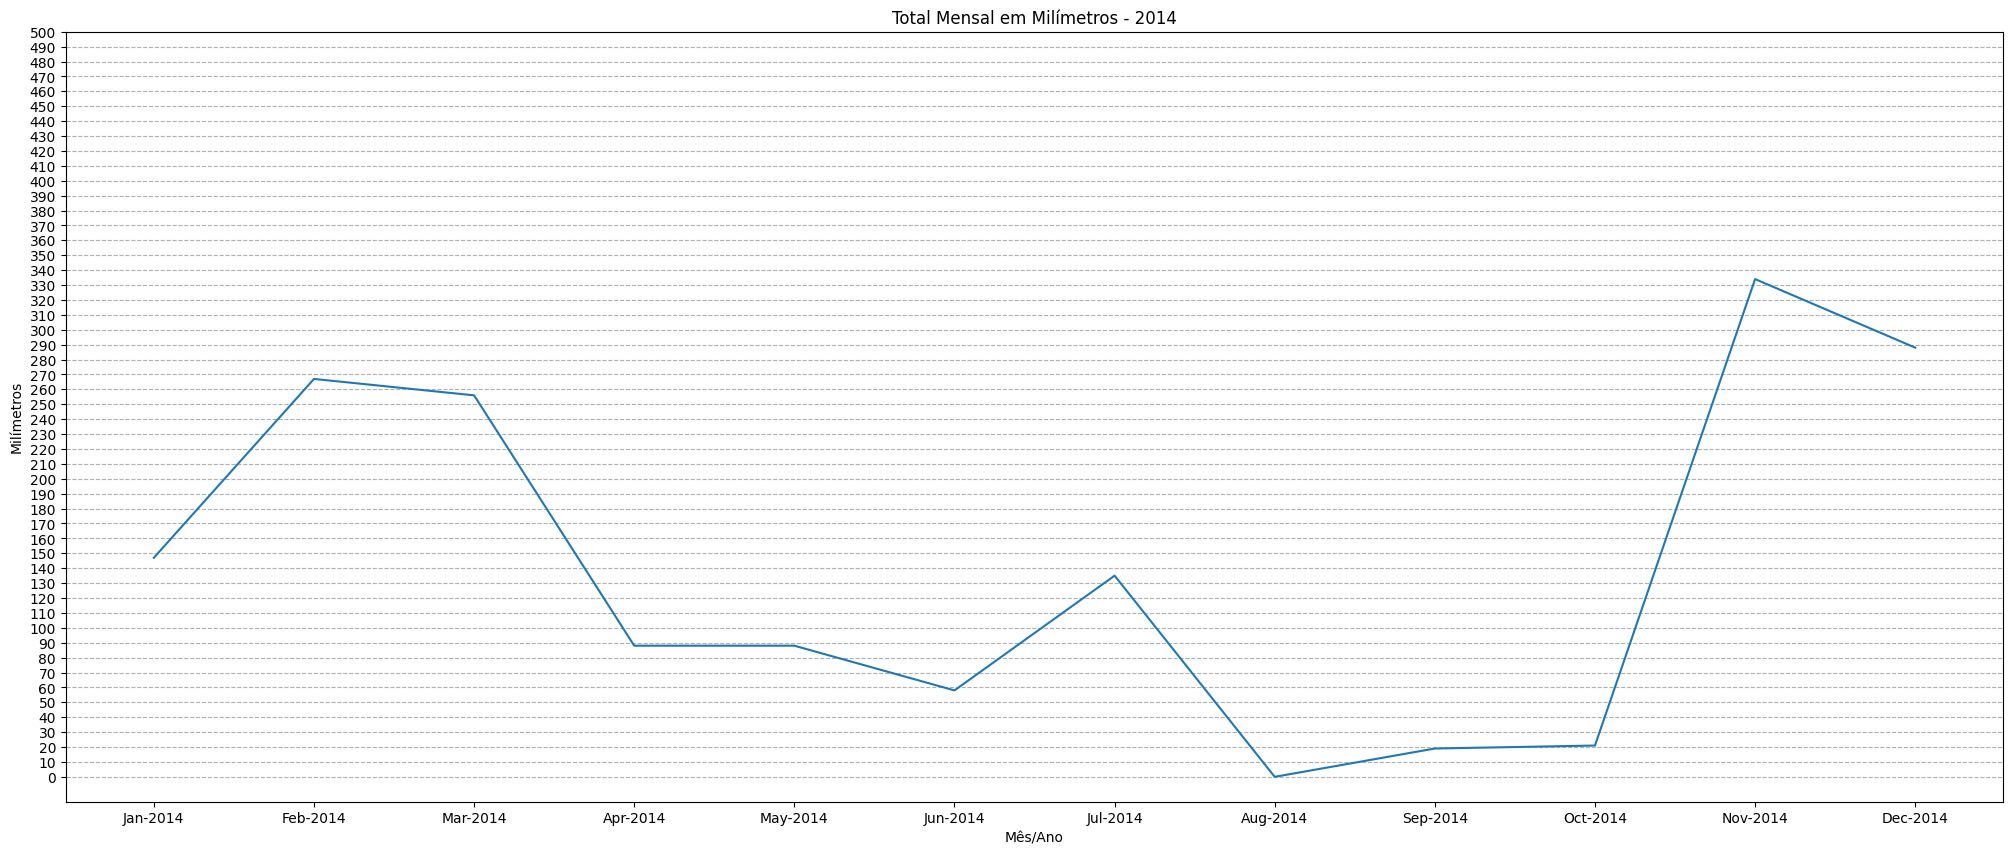

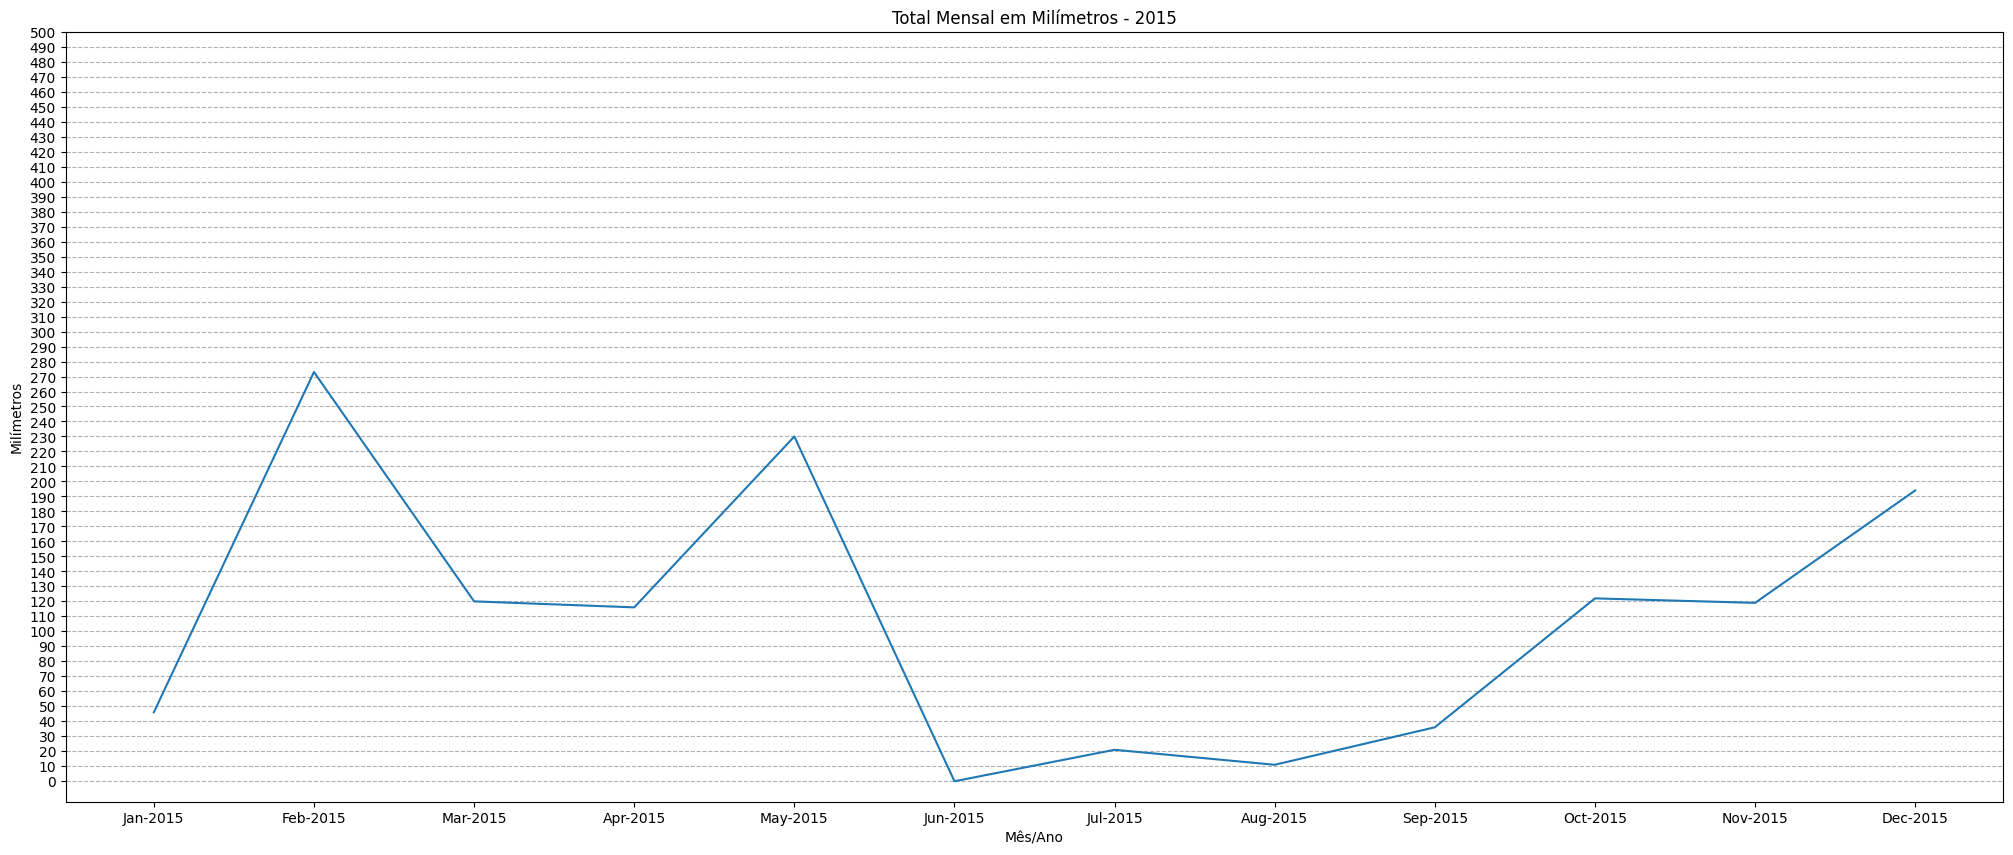

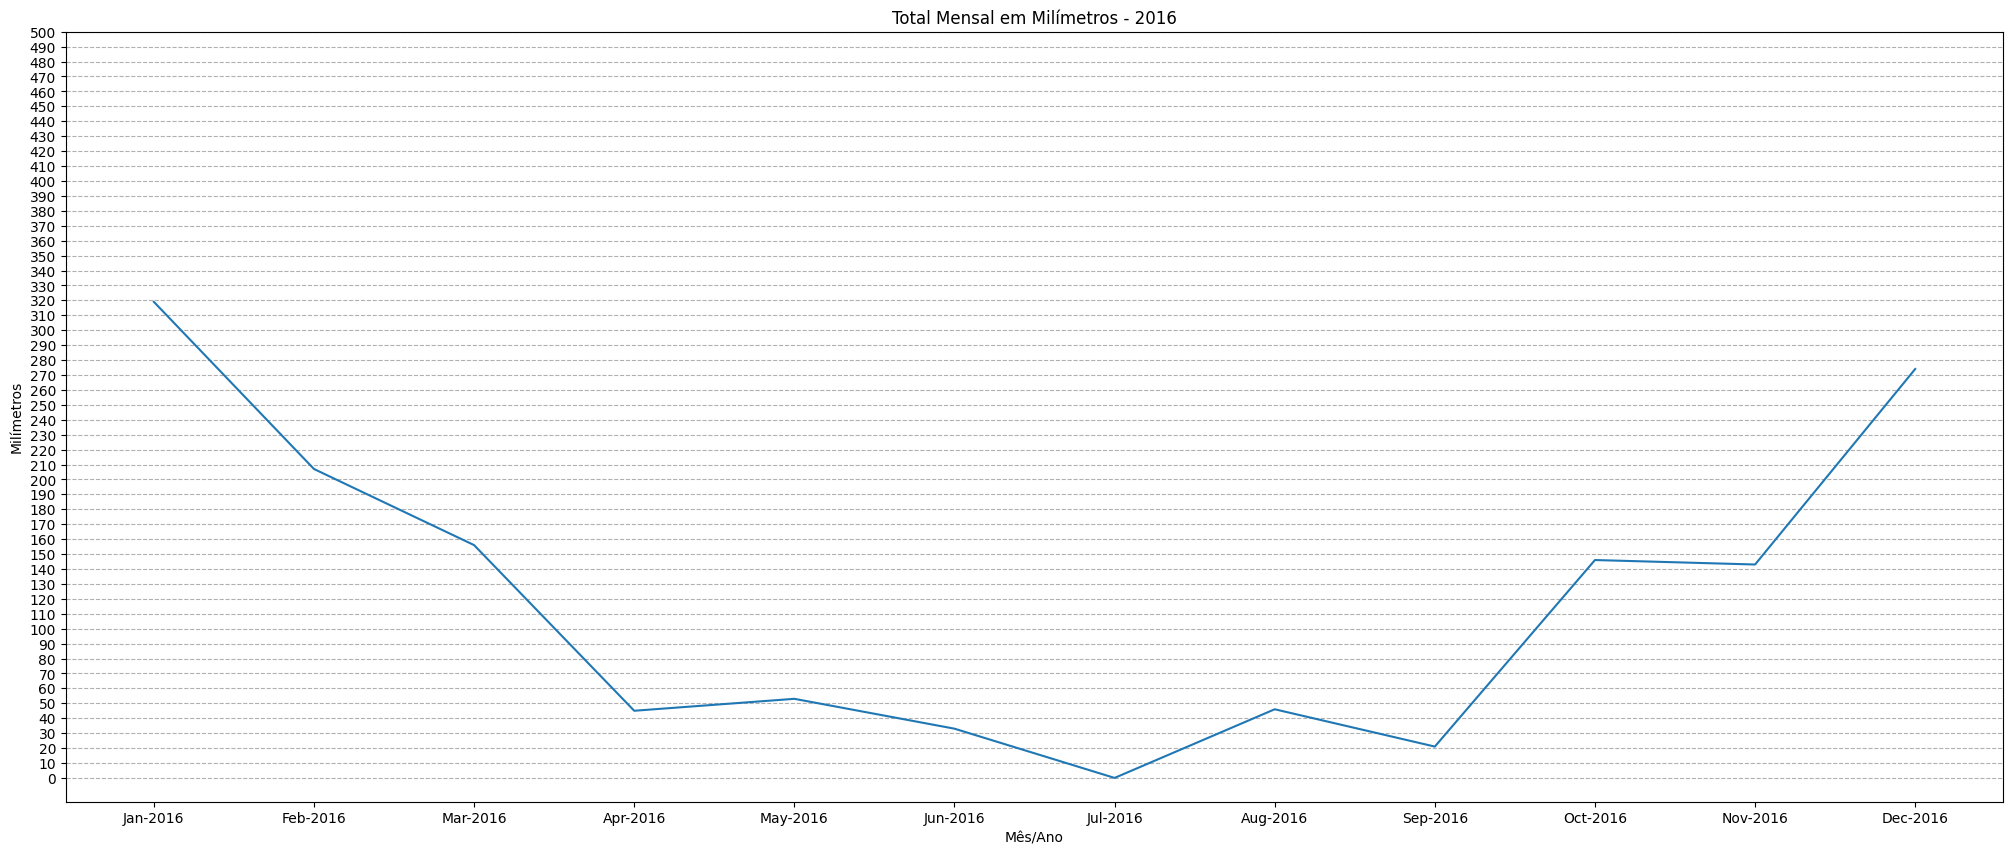

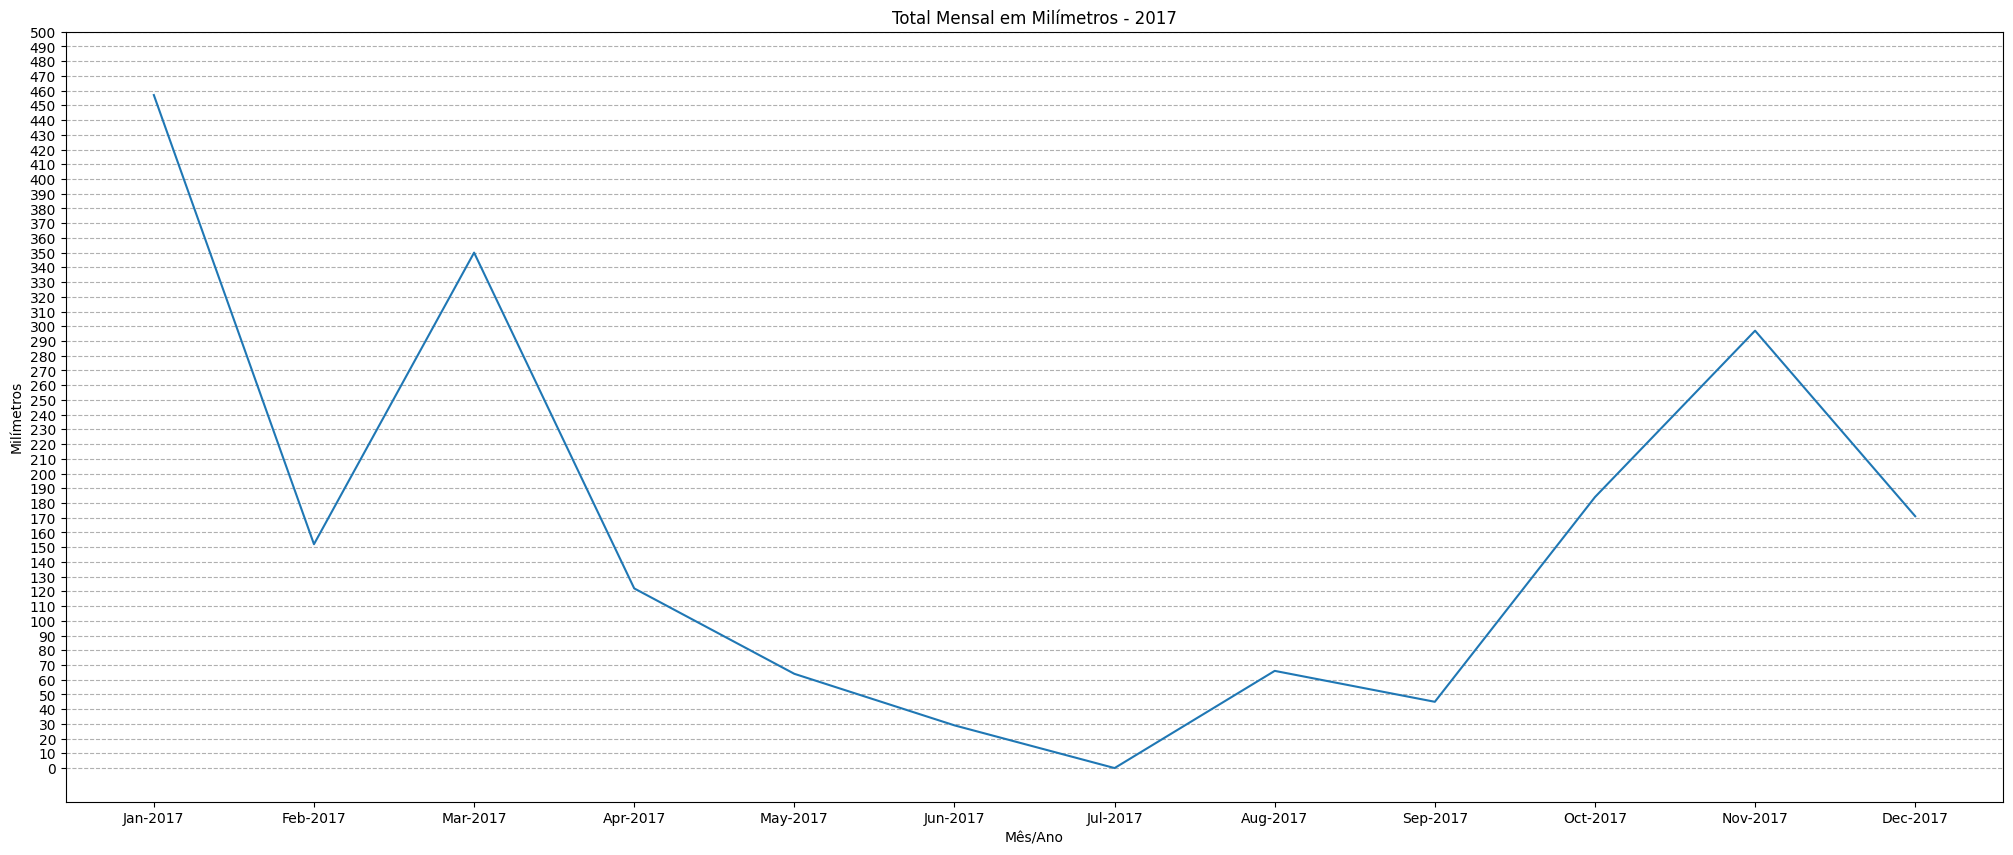

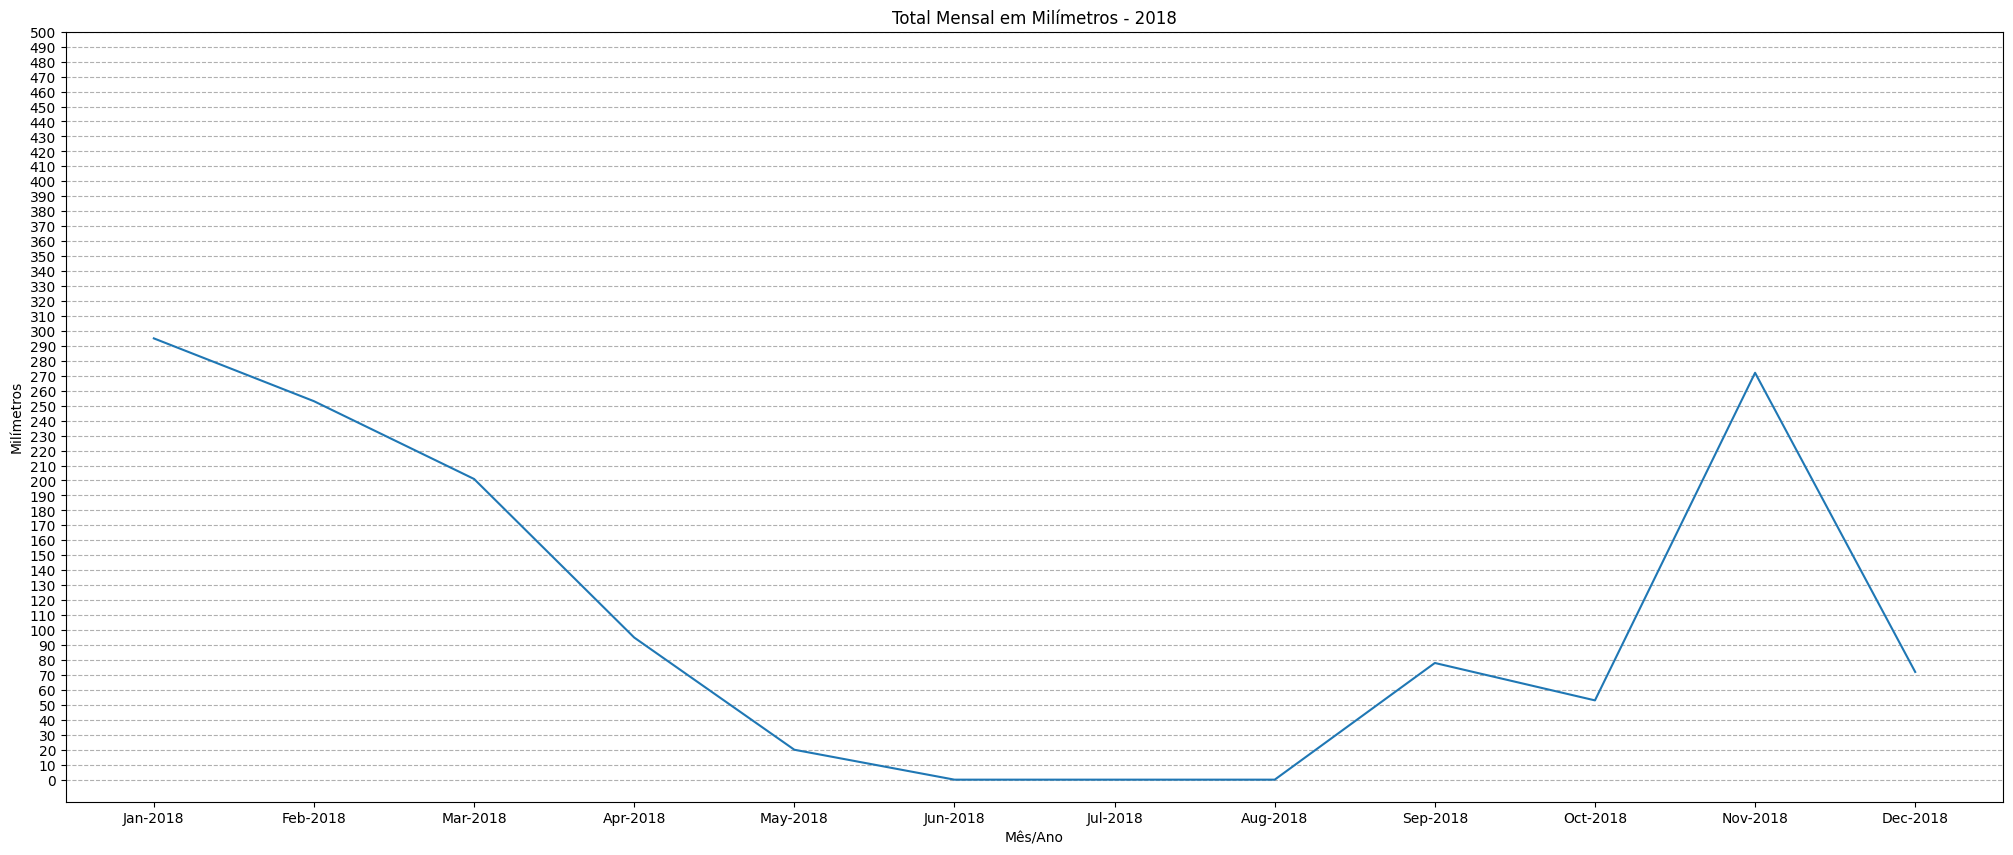

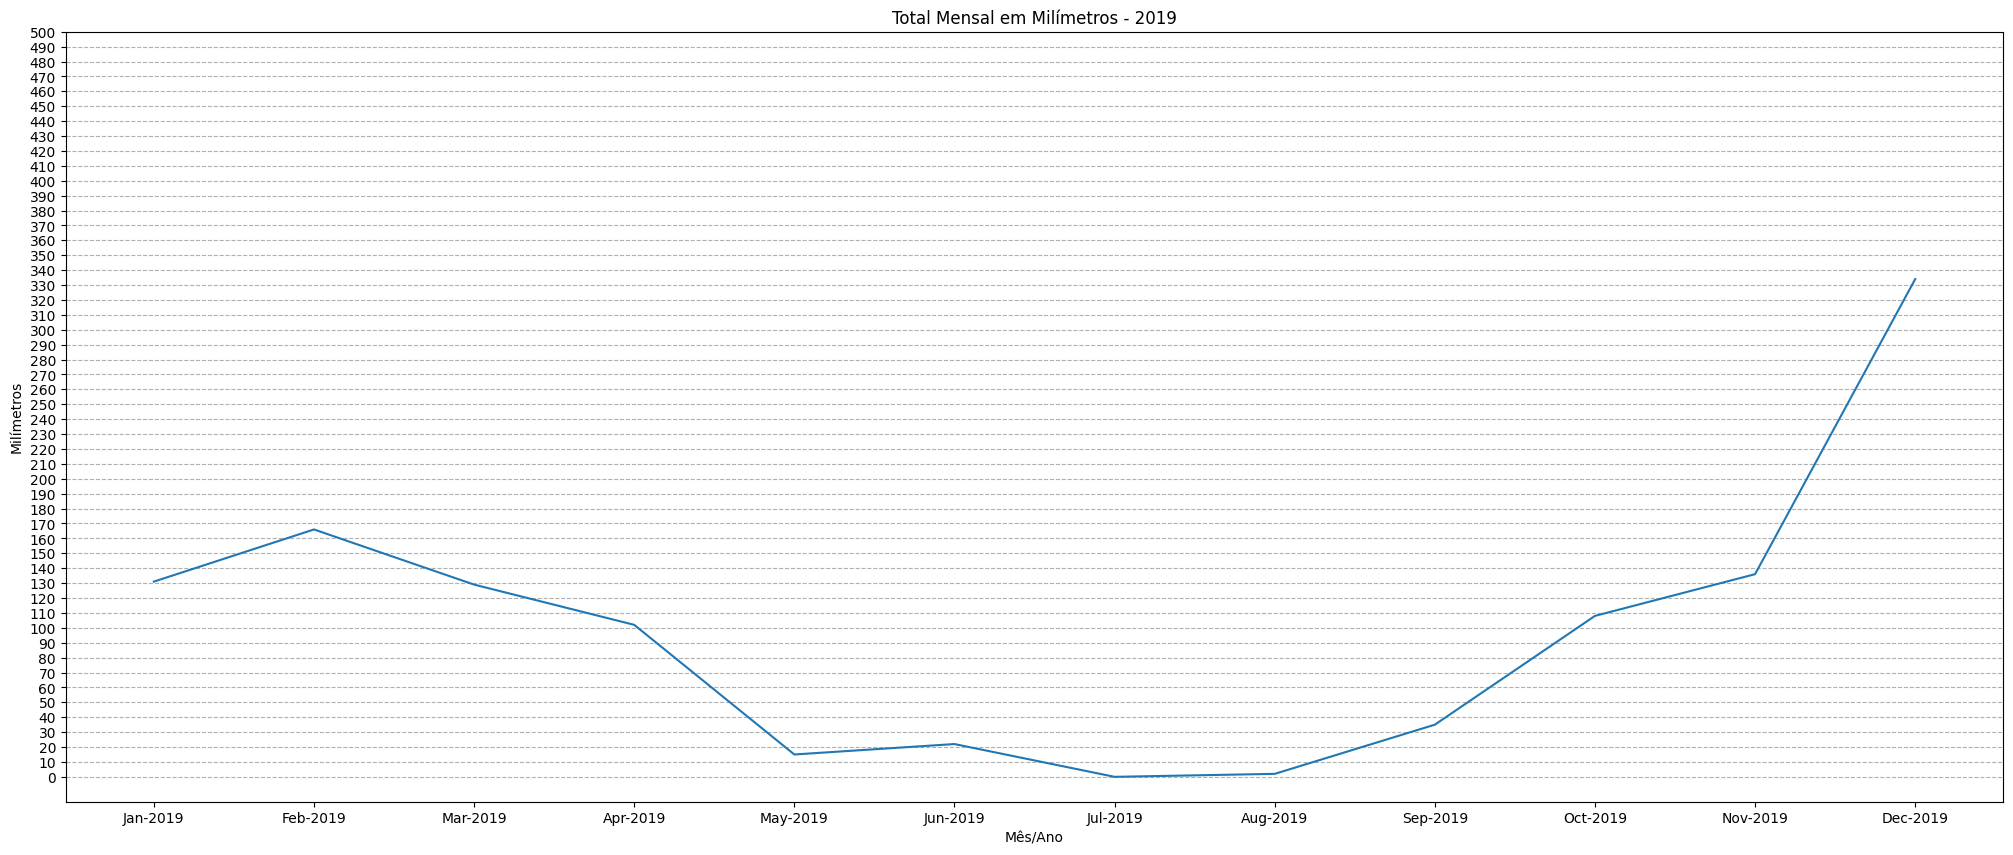

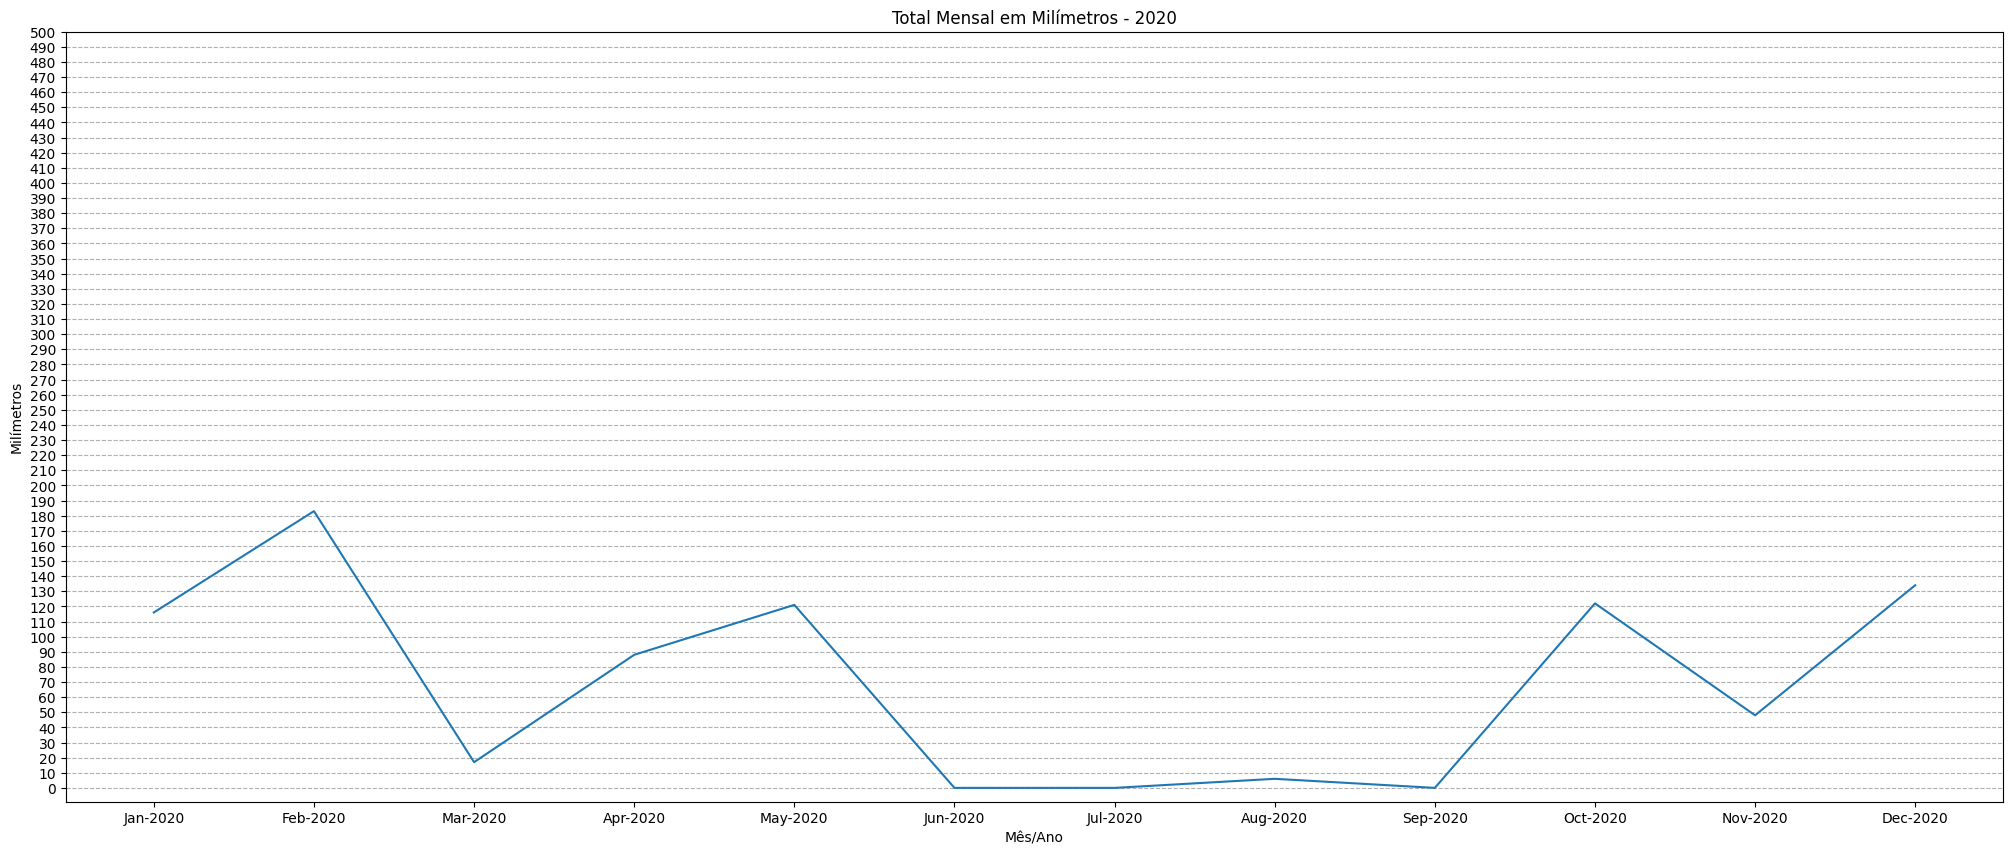

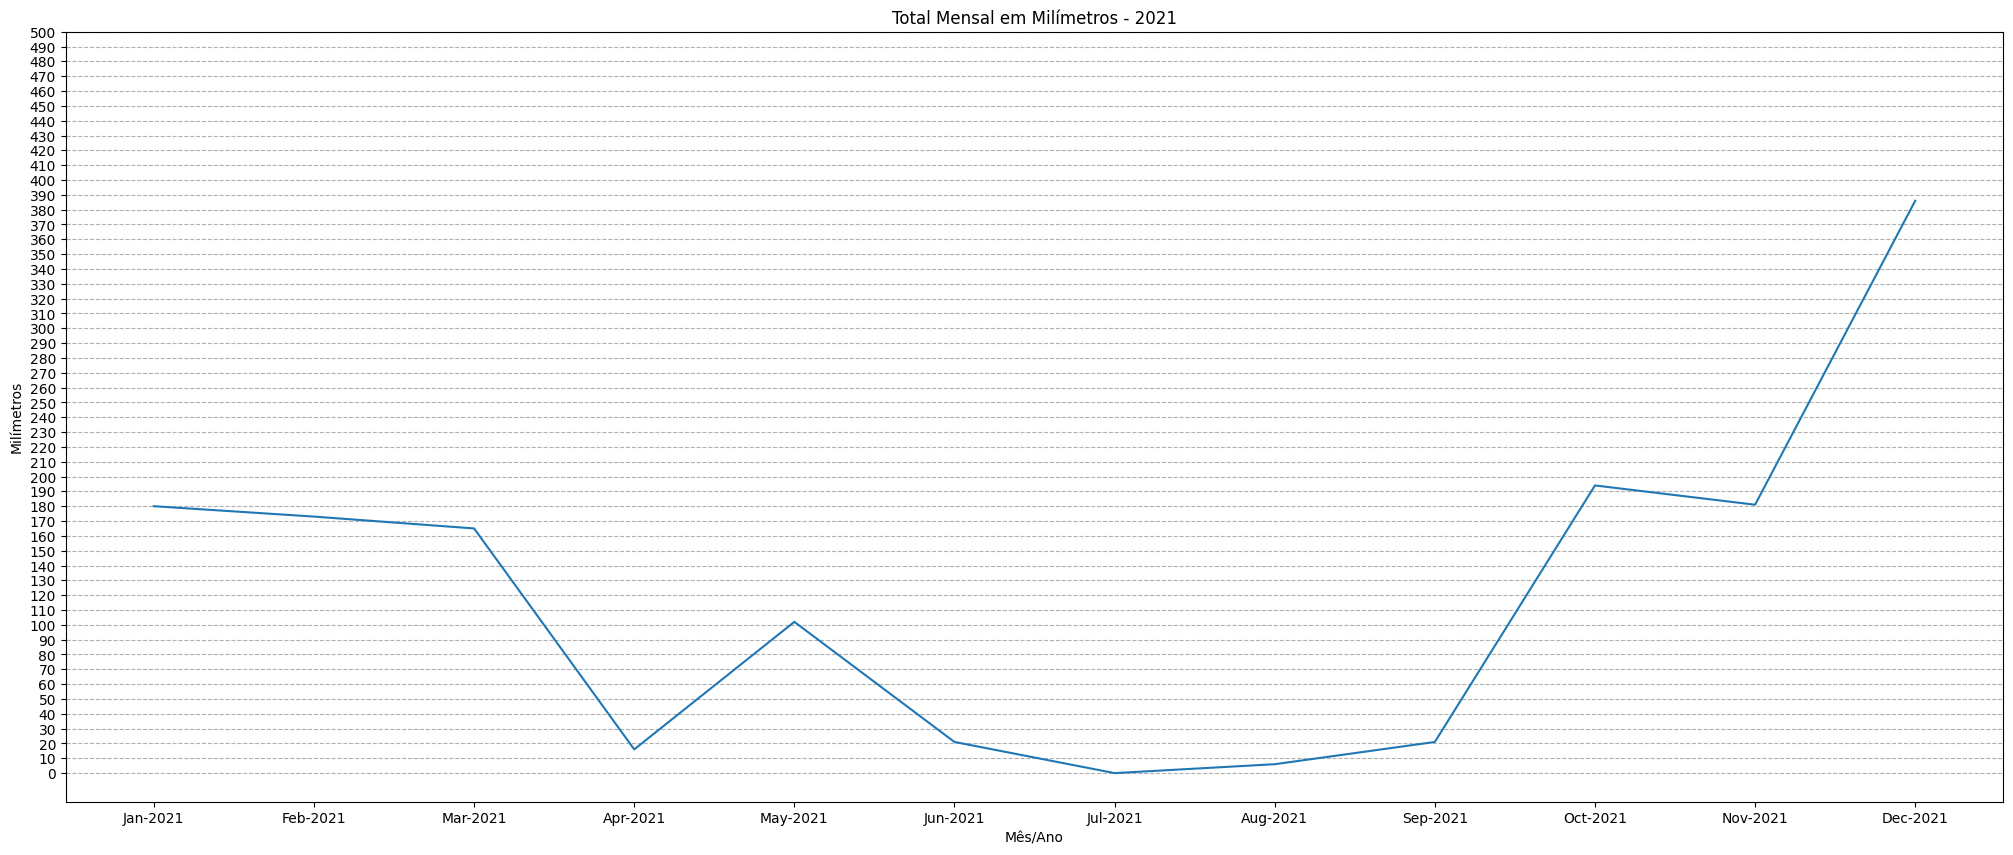

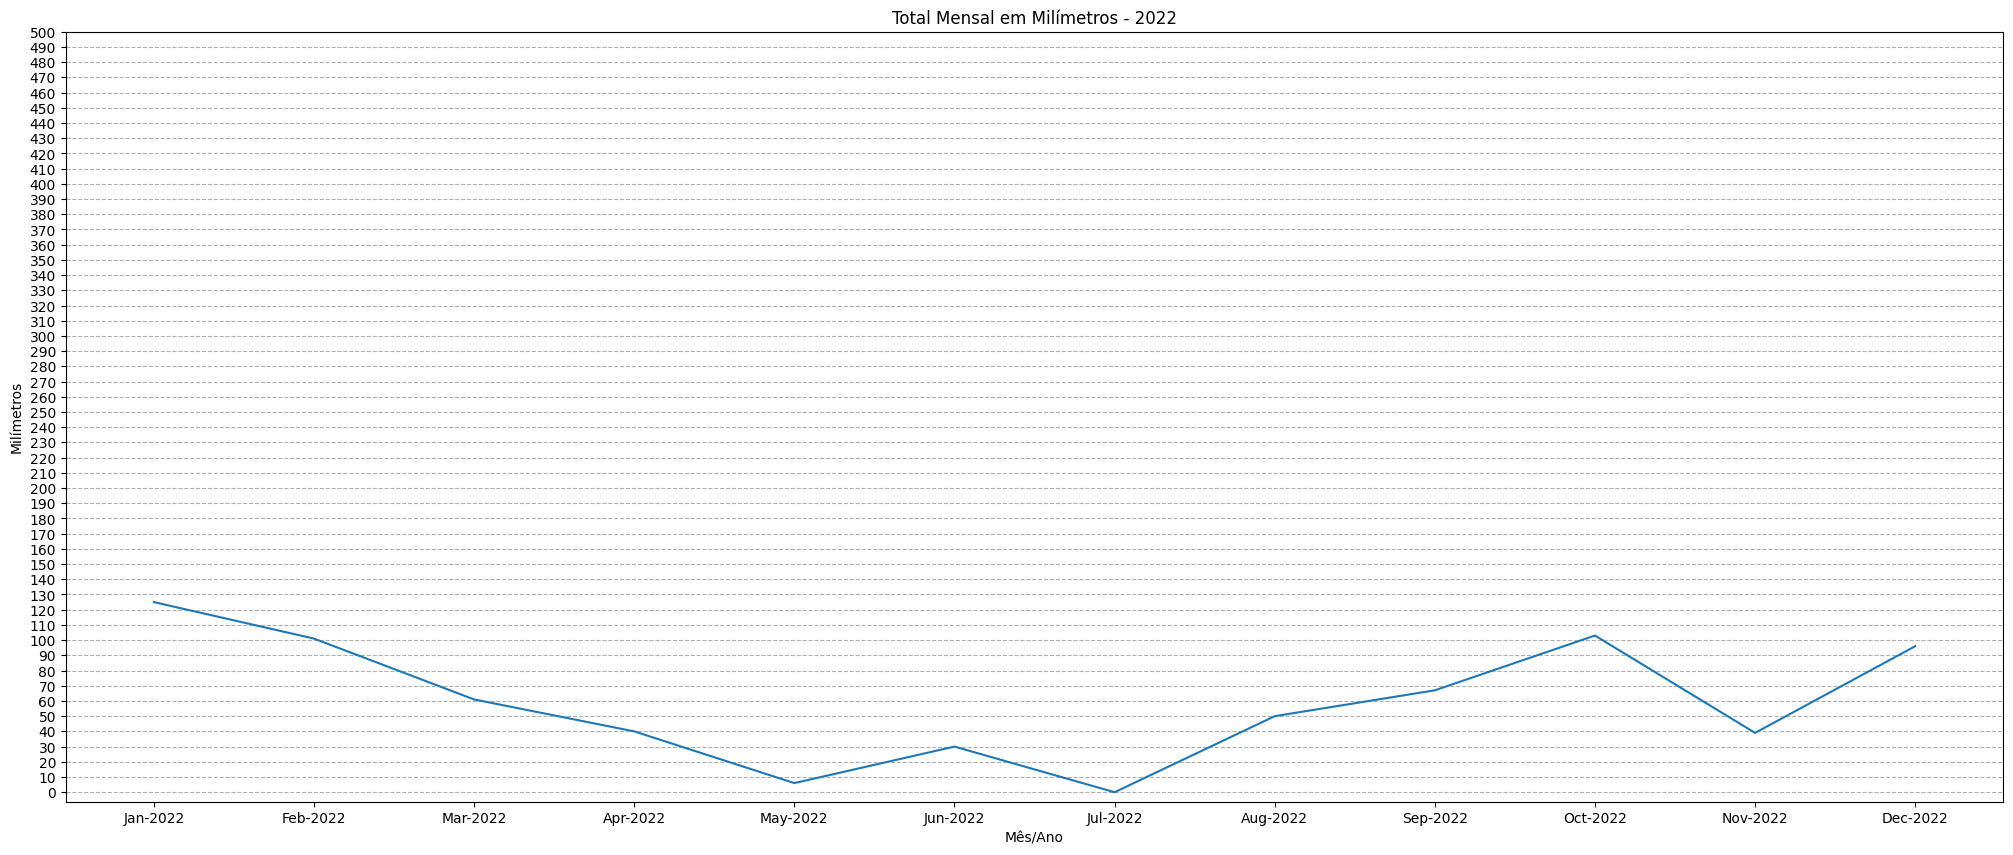

In [18]:
# criar uma lista com os anos presentes no dataframe
anos = df_mensal['Ano'].unique()

# iterar sobre os anos e gerar um gráfico para cada um
for ano in anos:
    # selecionar somente as linhas correspondentes a um determinado ano
    data_ano = df_mensal.loc[df_mensal['Ano'] == ano]
    
    # gerar o gráfico
    plt.figure(figsize=(25,10))
    ax = sns.lineplot(x='Mes_Ano', y='Total_Mensal', data=data_ano)
    ax.set_yticks(range(0, 501, 10))
    ax.grid(axis='y', linestyle='--')
    ax.set_title(f'Total Mensal em Milímetros - {ano}')
    ax.set_xlabel('Mês/Ano')
    ax.set_ylabel('Milímetros')
    plt.show()